# Notebook for analyzing KcsA Deactivated state
MD trajactory: kcsa_100ns_1125  1000ns using PDB 1K4C, E71 protonated, protein sequence S22 to H124 
MD parameters: OLPS4, POPC lipid with endogenous ligand POPG, 12 K+ (8 add in add ions ,4 with structture), 100 ns (sampling 1000 ps, 10000 frames)   
Step 1. calculate torsion angle  python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/centered-out.cms   1:103  A   kcsa_Deactivated1us_A_torsion.csv 
EX: 


In [1]:
chains = ['A', 'B', 'C', 'D']

for i, chain in zip(range(4),chains):
    print(f'python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/centered-out.cms   {1+i*103}:{103+i*103} {chain}  kcsa_Deactivated1us_{chain}_torsion.csv ')


python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/centered-out.cms   1:103 A  kcsa_Deactivated1us_A_torsion.csv 
python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/centered-out.cms   104:206 B  kcsa_Deactivated1us_B_torsion.csv 
python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/centered-out.cms   207:309 C  kcsa_Deactivated1us_C_torsion.csv 
python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/centered-out.cms   310:412 D  kcsa_Deactivated1us_D_torsion.csv 


In [2]:
#step2. processing torsion angle
import sys
import os
sys.path.append(os.path.expanduser("~/Dropbox/KcsA/scripts"))
from script_module import *

from torsion_analysis_module import TorsionAnalyzer2


    

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/data/filenames.py:110: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename


In [3]:
207-22


185

In [4]:
KcsA_analyzer = []

res_adjust_dict={'A':21, 'B':-82 , 'C':-185, 'D':-288}
# load data
for chain in ['A', 'B', 'C', 'D']:
    data_path = f'/Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/kcsa_Deactivated1us_{chain}_torsion.csv'
    if os.path.exists(data_path):
        print(f"File {data_path} exists.")
        # Load the data
        KcsA_analyzer.append(TorsionAnalyzer2(data_path, adjusted_residue_index=True, res_adjust_dic=res_adjust_dict))
    else:
        print(f"File {data_path} does not exist.")

File /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/kcsa_Deactivated1us_A_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/kcsa_Deactivated1us_B_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/kcsa_Deactivated1us_C_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/kcsa_Deactivated1us_D_torsion.csv exists.


In [5]:
intra_correlation = KcsA_analyzer[1].calculate_intra_residue_correlation()
print("Intra-residue Correlations (φ(i) vs ψ(i)):")
for residue, correlation in intra_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

Intra-residue Correlations (φ(i) vs ψ(i)):
Residue B:22: nan
Residue B:23: -0.514
Residue B:24: -0.558
Residue B:25: -0.390
Residue B:26: -0.408
Residue B:27: -0.429
Residue B:28: -0.418
Residue B:29: -0.449
Residue B:30: -0.535
Residue B:31: -0.386
Residue B:32: -0.451
Residue B:33: -0.469
Residue B:34: -0.504
Residue B:35: -0.456
Residue B:36: -0.419
Residue B:37: -0.505
Residue B:38: -0.496
Residue B:39: -0.479
Residue B:40: -0.429
Residue B:41: -0.401
Residue B:42: -0.370
Residue B:43: -0.556
Residue B:44: -0.376
Residue B:45: -0.175
Residue B:46: -0.458
Residue B:47: -0.450
Residue B:48: -0.388
Residue B:49: -0.378
Residue B:50: -0.327
Residue B:51: -0.457
Residue B:52: 0.053
Residue B:53: 0.304
Residue B:54: 0.146
Residue B:55: 0.205
Residue B:56: -0.096
Residue B:57: -0.416
Residue B:58: -0.293
Residue B:59: -0.404
Residue B:60: -0.666
Residue B:61: -0.166
Residue B:62: -0.557
Residue B:63: -0.539
Residue B:64: -0.406
Residue B:65: -0.429
Residue B:66: -0.425
Residue B:67: -0.41

In [6]:
KcsA_analyzer[1].data

frame_index      time_ps    B:22-psi  B:22-phi    B:23-psi   B:23-phi  \
0                0        0.000  128.970841       NaN  161.855024 -83.812811   
1                1      100.002   51.239982       NaN  153.790115 -50.983279   
2                2      200.004    0.086312       NaN  141.910343 -75.188072   
3                3      300.006   -8.448553       NaN   66.291994  67.531117   
4                4      400.008    8.460831       NaN   63.581143  70.762495   
...            ...          ...         ...       ...         ...        ...   
9996          9996   999619.992    6.272327       NaN   61.113974  71.896079   
9997          9997   999719.994  -16.012128       NaN   36.005993  70.097773   
9998          9998   999819.996   97.345864       NaN   25.254578  78.066530   
9999          9999   999919.998   91.275540       NaN   24.338090  63.232188   
10000        10000  1000000.008  -11.497222       NaN   61.371719  57.475914   

        B:24-psi   B:24-phi   B:25-psi   B:25-phi  ...  B:120-psi   B:120-phi  \
0     -42.987075 -59.171484 -27.776876 -70.803570  ... -28.681454  -66.144478   
1     -45.417824 -47.132754 -41.233682 -50.988068  ... -30.396240  -72.810284   
2     -52.639816 -49.130171 -36.042072 -46.465445  ... -33.816279  -64.742140   
3     -29.646948 -50.652290 -48.606314 -53.119119  ... -30.856450  -71.199671   
4     -28.059700 -61.068875 -41.493995 -46.867806  ... -32.165399  -68.317595   
...          ...        ...        ...        ...  ...        ...         ...   
9996  -38.353963 -69.808506 -31.316369 -57.112507  ... -10.123122  -60.162496   
9997  -40.947354 -59.178623 -40.402396 -56.189000  ...  -8.864861  -87.662705   
9998  -36.259465 -67.646151 -30.393823 -70.229150  ... -12.522849  -82.388945   
9999  -30.102190 -71.386715 -37.284255 -67.191973  ...  54.437830 -103.060832   
10000 -40.223794 -45.623331 -33.552365 -70.225184  ...   4.563232  -65.829058   

        B:121-psi   B:121-phi  B:122-psi   B:122-phi   B:123-psi  B:123-phi  \
0      -31.375846  -57.223115   4.997149 -101.177943    6.663630  85.381852   
1      -49.721832  -65.661020   5.629749  -77.747388   22.062622  71.848080   
2      -38.572772  -63.948727  -4.441453  -78.235088   31.668407  70.930619   
3      -49.470394  -50.354395 -15.034686  -82.981460   39.177653  83.550215   
4      -15.828250  -67.545290   6.686527 -125.882542   60.158766  44.357378   
...           ...         ...        ...         ...         ...        ...   
9996   164.903340  -97.746408  57.710274  -68.662926  160.219778  98.149728   
9997   154.552622  -81.620882  62.321330  -73.910358  160.431769  92.343526   
9998   166.175155  -72.364807  67.061949  -85.981110  151.255717  94.305833   
9999   162.334436 -124.644575  75.595578  -81.094369  174.054621  93.193473   
10000  162.453353 -125.609552  73.101758  -82.703854  166.599497  83.244427   

       B:124-psi   B:124-phi  
0            NaN  -96.774090  
1            NaN  -83.325757  
2            NaN  -95.011806  
3            NaN  -86.460344  
4            NaN  -88.581900  
...          ...         ...  
9996         NaN -106.673259  
9997         NaN  -93.952182  
9998         NaN  -87.327961  
9999         NaN -119.363720  
10000        NaN -103.994235  

[10001 rows x 208 columns]

In [7]:
#calculate inter-residue correlation
inter_correlation = KcsA_analyzer[0].calculate_inter_residue_correlation()
print("Inter-residue Correlations (φ(i+1) vs ψ(i)):")
for residue, correlation in inter_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

Inter-residue Correlations (φ(i+1) vs ψ(i)):
Residue A:22: 0.135
Residue A:23: 0.199
Residue A:24: -0.307
Residue A:25: -0.627
Residue A:26: -0.561
Residue A:27: -0.542
Residue A:28: -0.504
Residue A:29: -0.467
Residue A:30: -0.546
Residue A:31: -0.541
Residue A:32: -0.540
Residue A:33: -0.473
Residue A:34: -0.521
Residue A:35: -0.524
Residue A:36: -0.415
Residue A:37: -0.462
Residue A:38: -0.491
Residue A:39: -0.553
Residue A:40: -0.563
Residue A:41: -0.549
Residue A:42: -0.441
Residue A:43: -0.531
Residue A:44: -0.731
Residue A:45: -0.527
Residue A:46: -0.531
Residue A:47: -0.558
Residue A:48: -0.490
Residue A:49: -0.672
Residue A:50: -0.421
Residue A:51: -0.563
Residue A:52: 0.897
Residue A:53: -0.538
Residue A:54: -0.353
Residue A:55: 0.932
Residue A:56: -0.289
Residue A:57: -0.379
Residue A:58: -0.340
Residue A:59: -0.789
Residue A:60: -0.547
Residue A:61: -0.446
Residue A:62: -0.350
Residue A:63: -0.450
Residue A:64: -0.542
Residue A:65: -0.552
Residue A:66: -0.683
Residue A:67: 

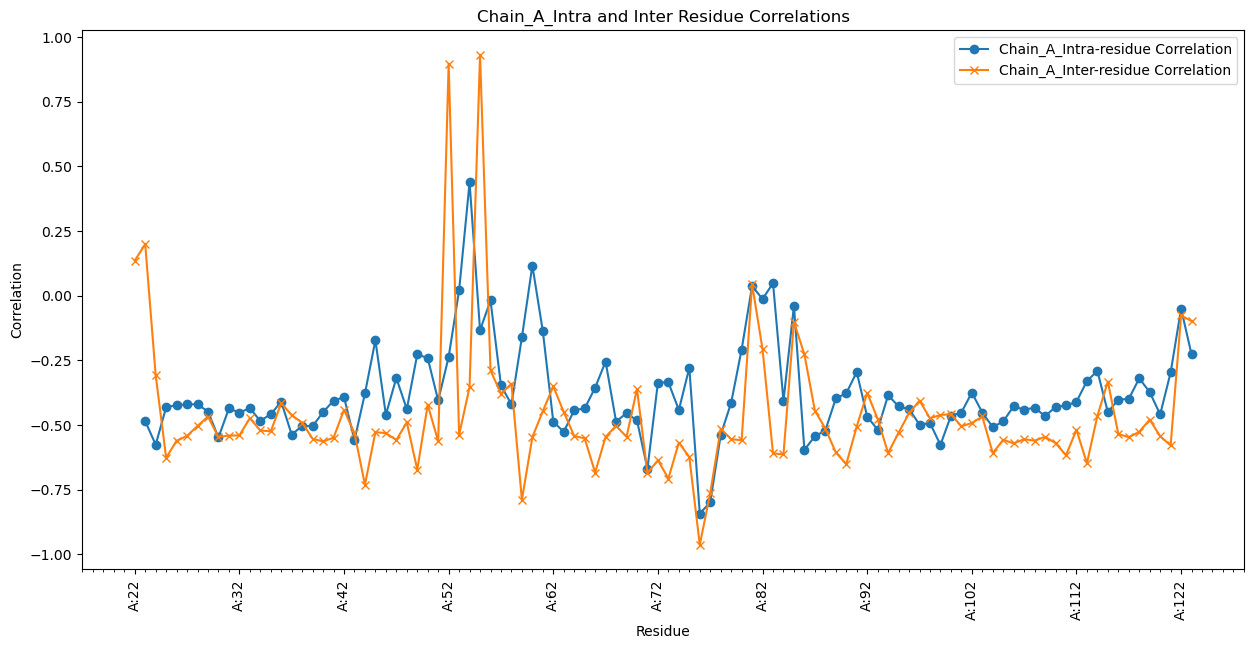

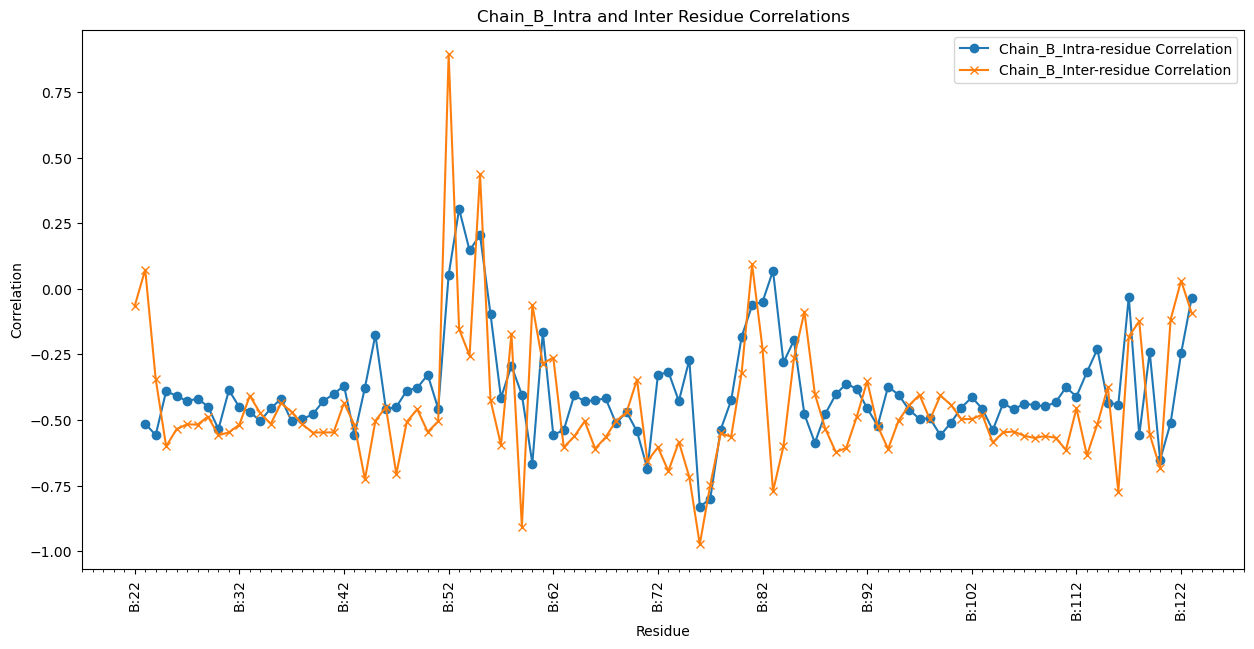

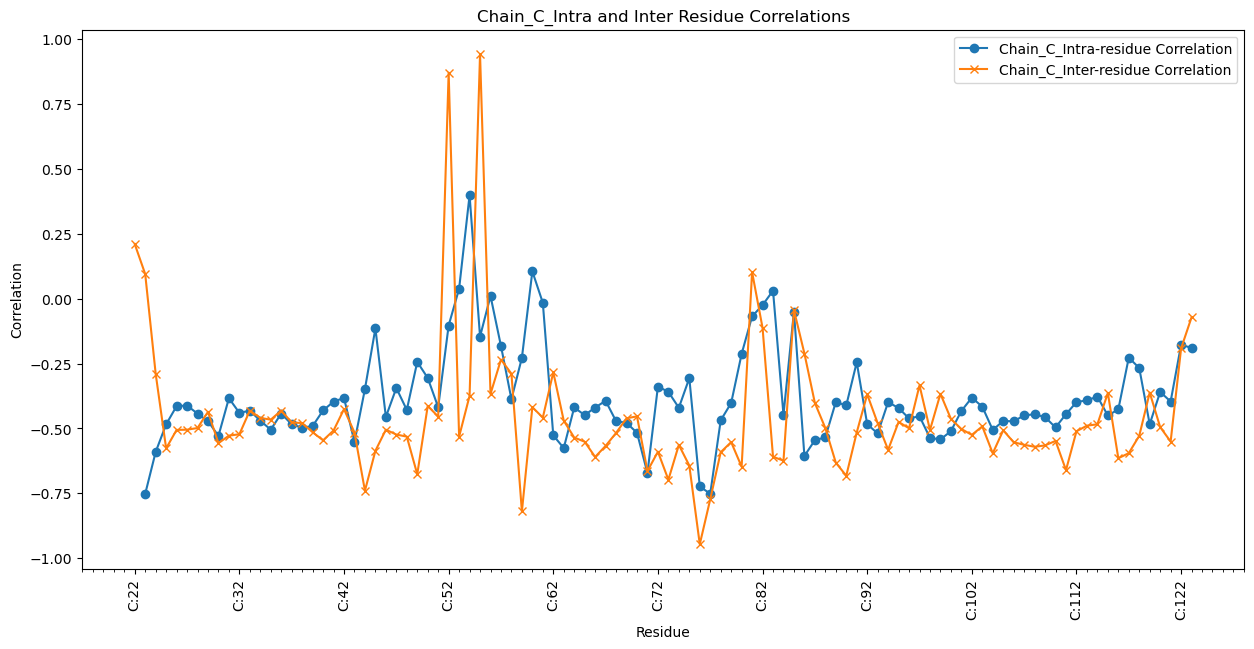

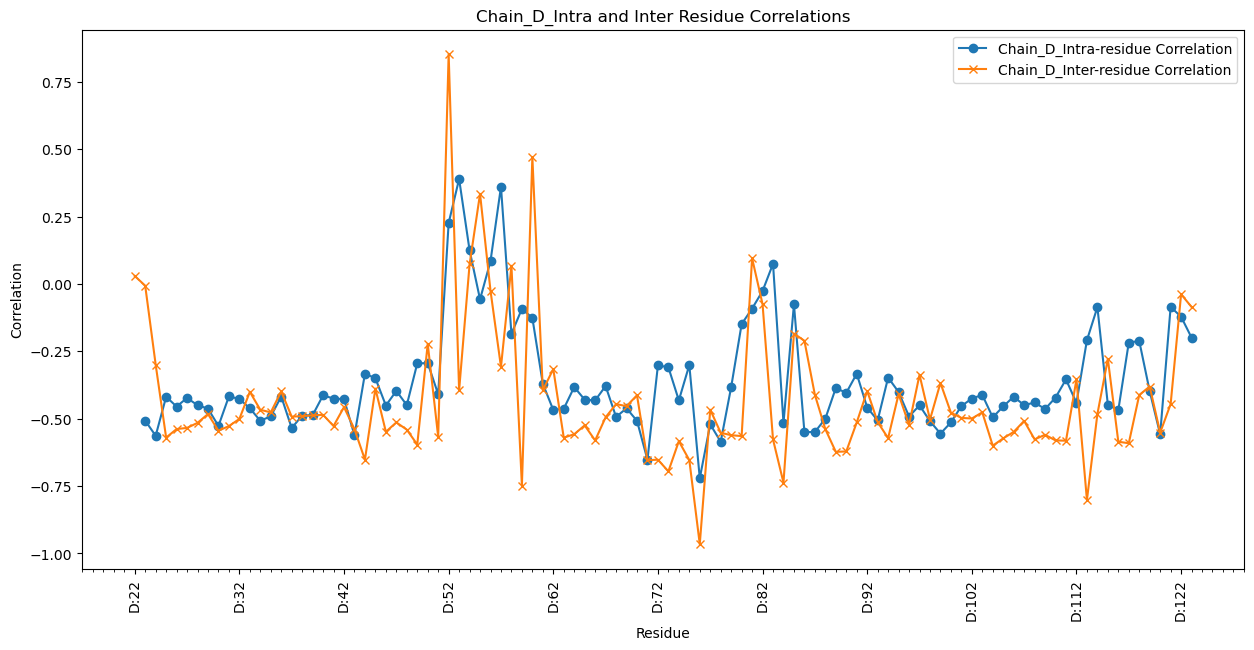

In [8]:
#plot the correlation
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
for chain, i in zip(['A', 'B', 'C', 'D'], range(4)):

    inter_correlation = KcsA_analyzer[i].calculate_inter_residue_correlation()
    intra_correlation = KcsA_analyzer[i].calculate_intra_residue_correlation()
    # Extract residues and their corresponding correlations
    residues = list(intra_correlation.keys())
    intra_values = list(intra_correlation.values())
    inter_values = list(inter_correlation.values())

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 7))

    # Plot intra-residue correlations
    ax.plot(residues, intra_values, label=f'Chain_{chain}_Intra-residue Correlation', marker='o')

    # Plot inter-residue correlations
    ax.plot(residues[:-1], inter_values, label=f'Chain_{chain}_Inter-residue Correlation', marker='x')


    # Set labels and title
    ax.set_xlabel('Residue')
    ax.set_ylabel('Correlation')
    ax.set_title(f'Chain_{chain}_Intra and Inter Residue Correlations')
    ax.legend()

    # Set up major and minor tickers
    major_locator = MultipleLocator(10)  # Adjust to the desired spacing of major ticks
    minor_locator = MultipleLocator(1)   # Adjust to the desired spacing of minor ticks

    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)

    # Rotate x-axis labels for better readability and only show for major ticks
    ax.tick_params(axis='x', which='major', labelrotation=90)
    ax.tick_params(axis='x', which='minor', labelbottom=False)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    plt.savefig(f'intra_inter_residue_correlation_chain_{chain}.png', dpi=300, bbox_inches='tight')
    plt.show()

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Combined plot saved as KcsA_Rama_plots_chainA/Combined_Ramachandran_1k4c.png


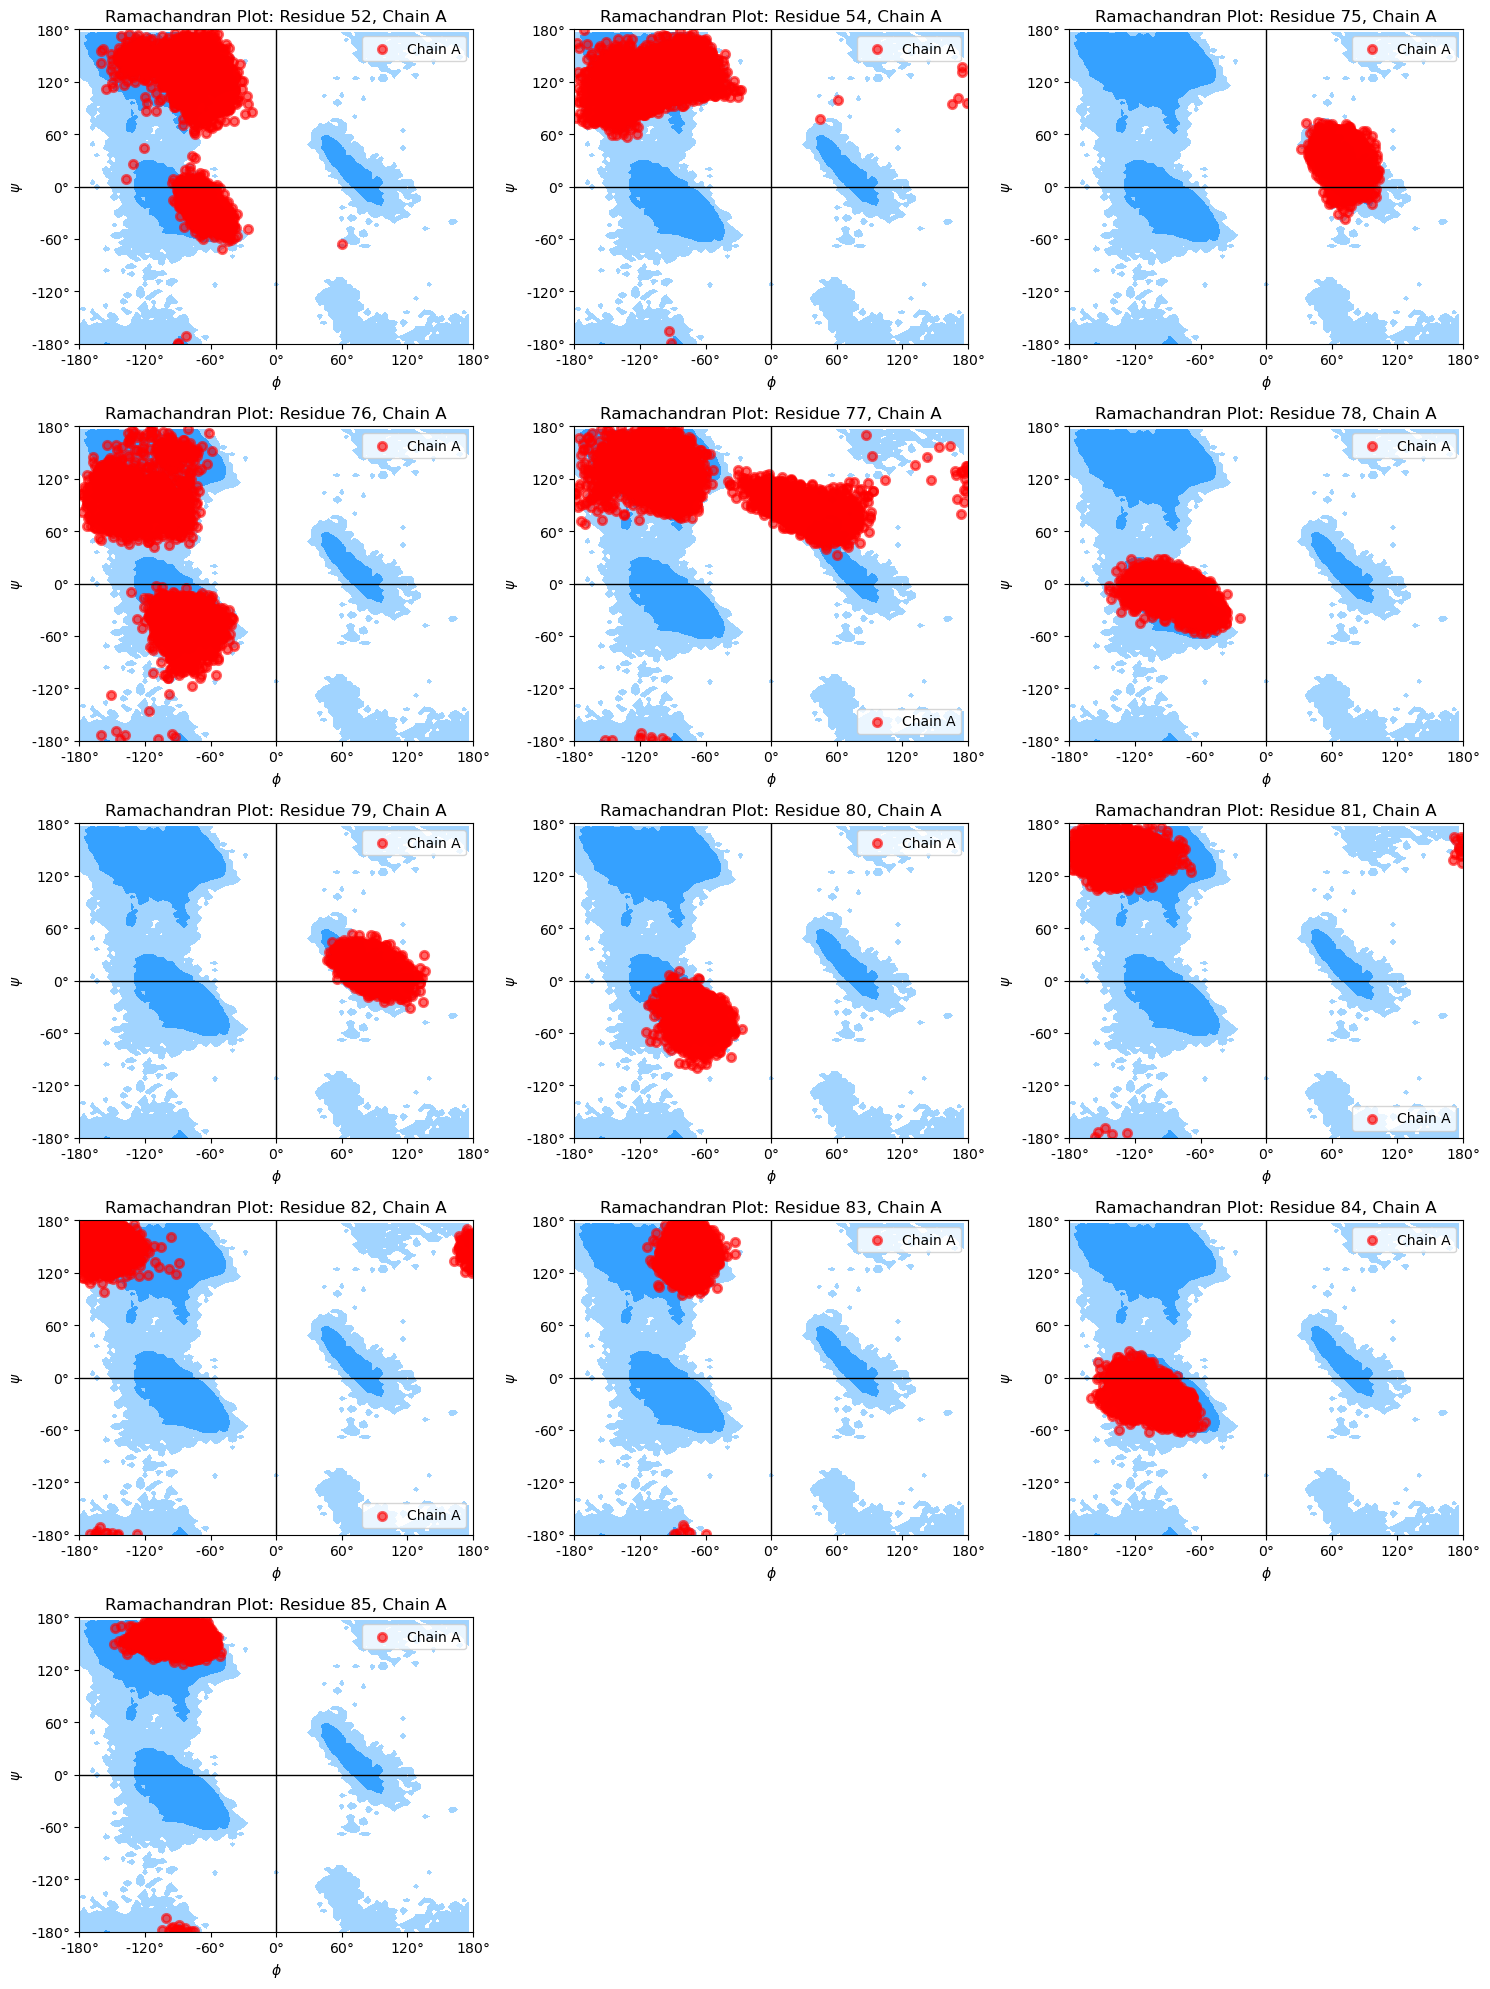

Combined plot saved as KcsA_Rama_plots_chainB/Combined_Ramachandran_1k4c.png


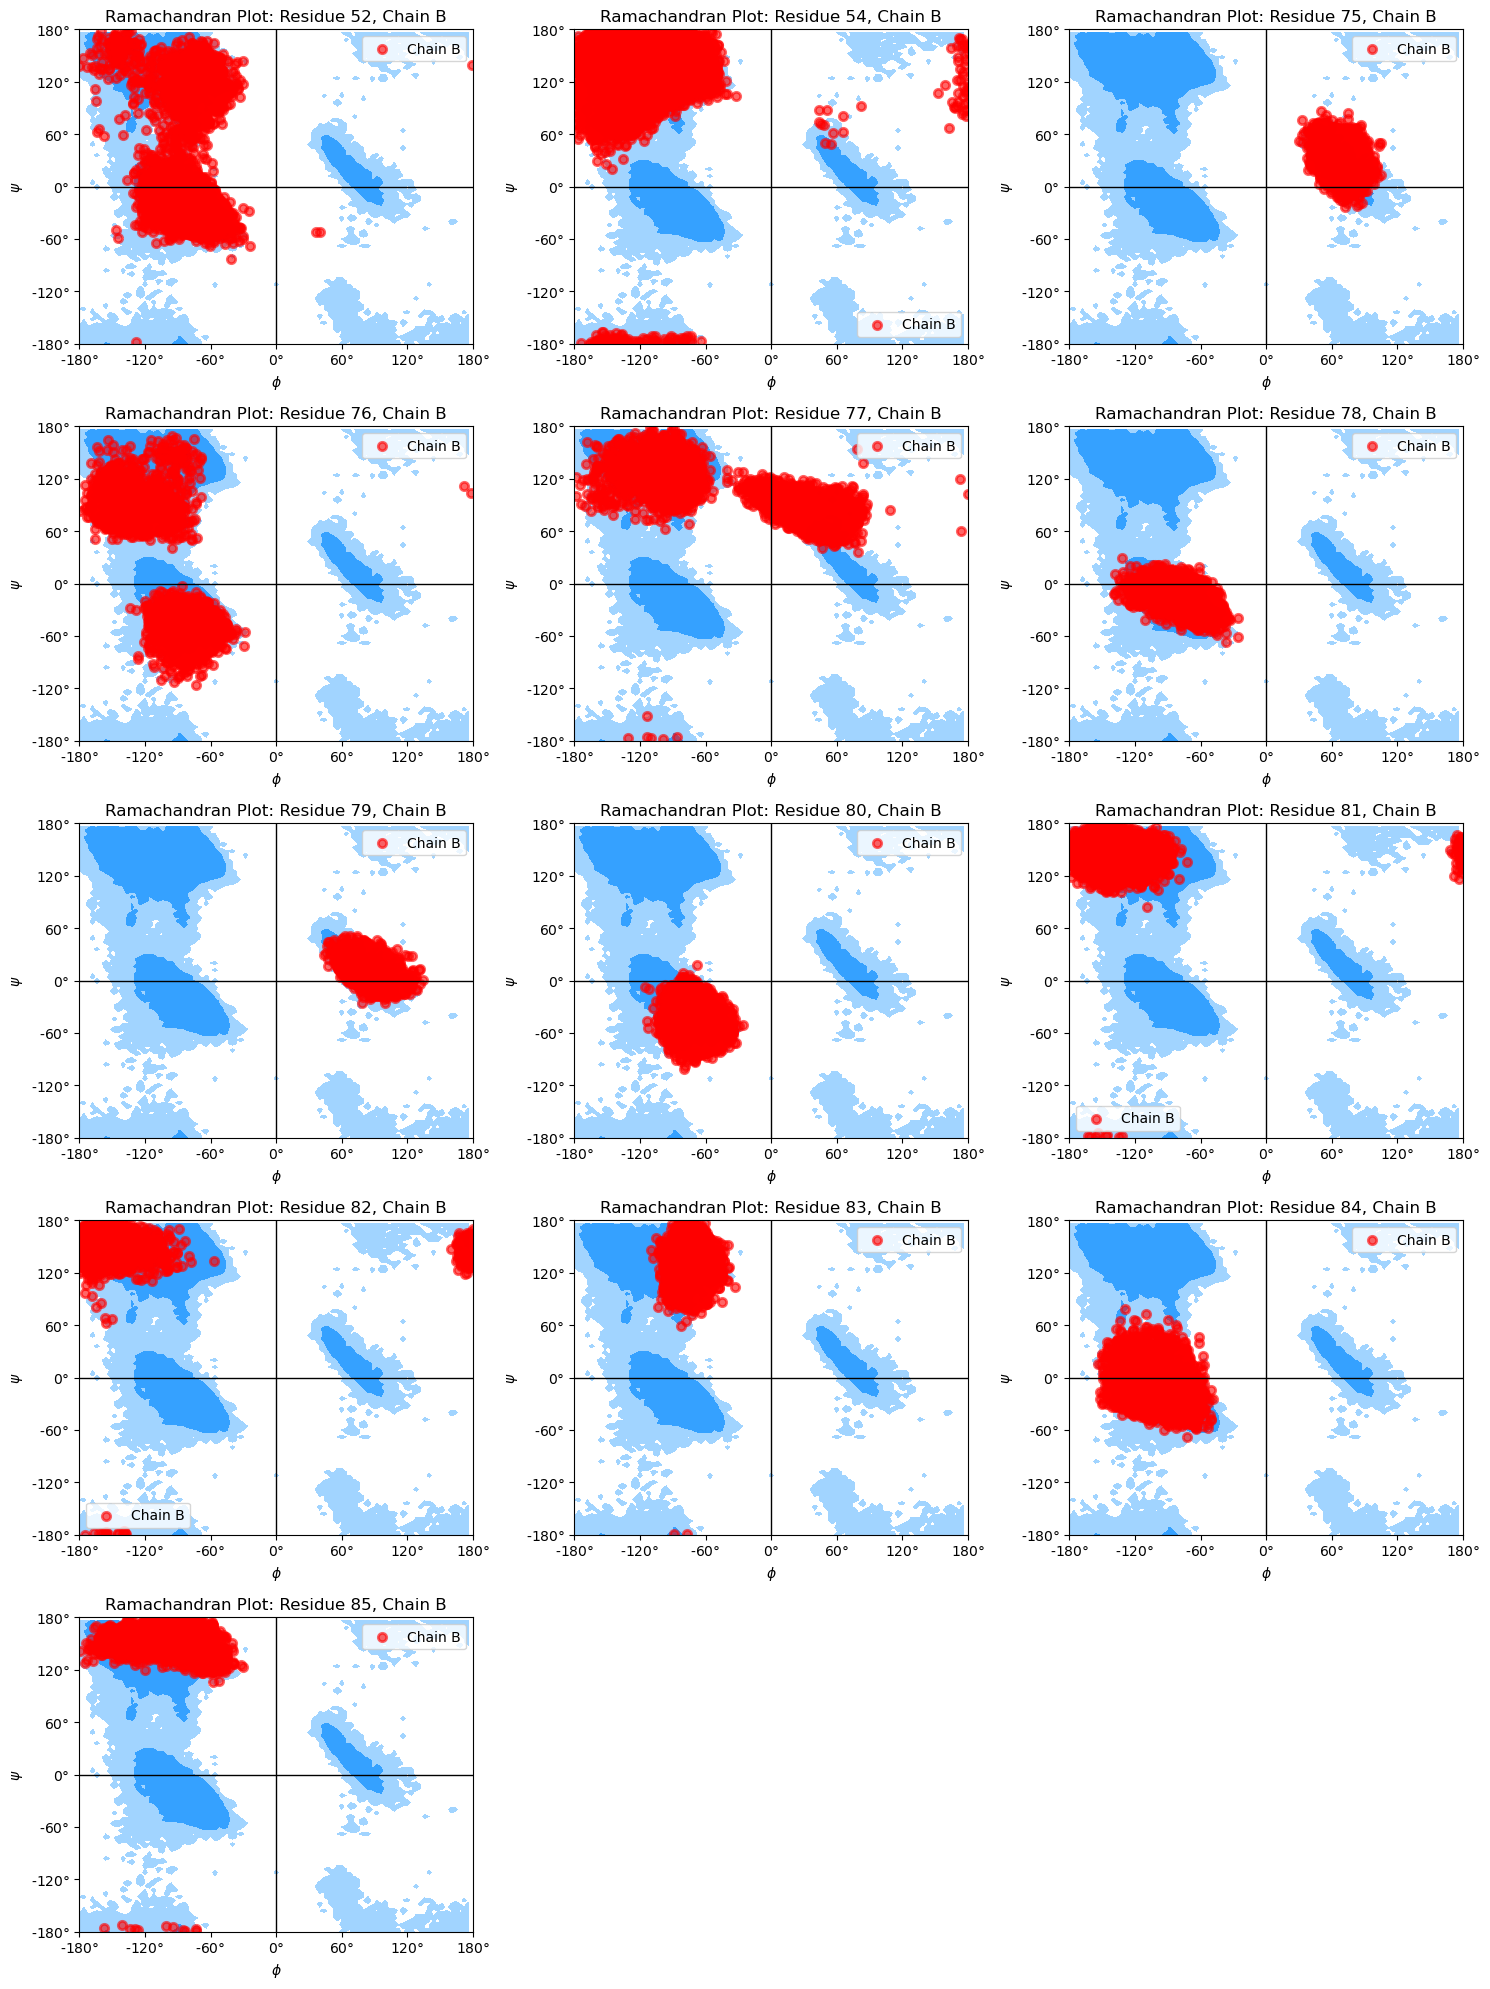

Combined plot saved as KcsA_Rama_plots_chainC/Combined_Ramachandran_1k4c.png


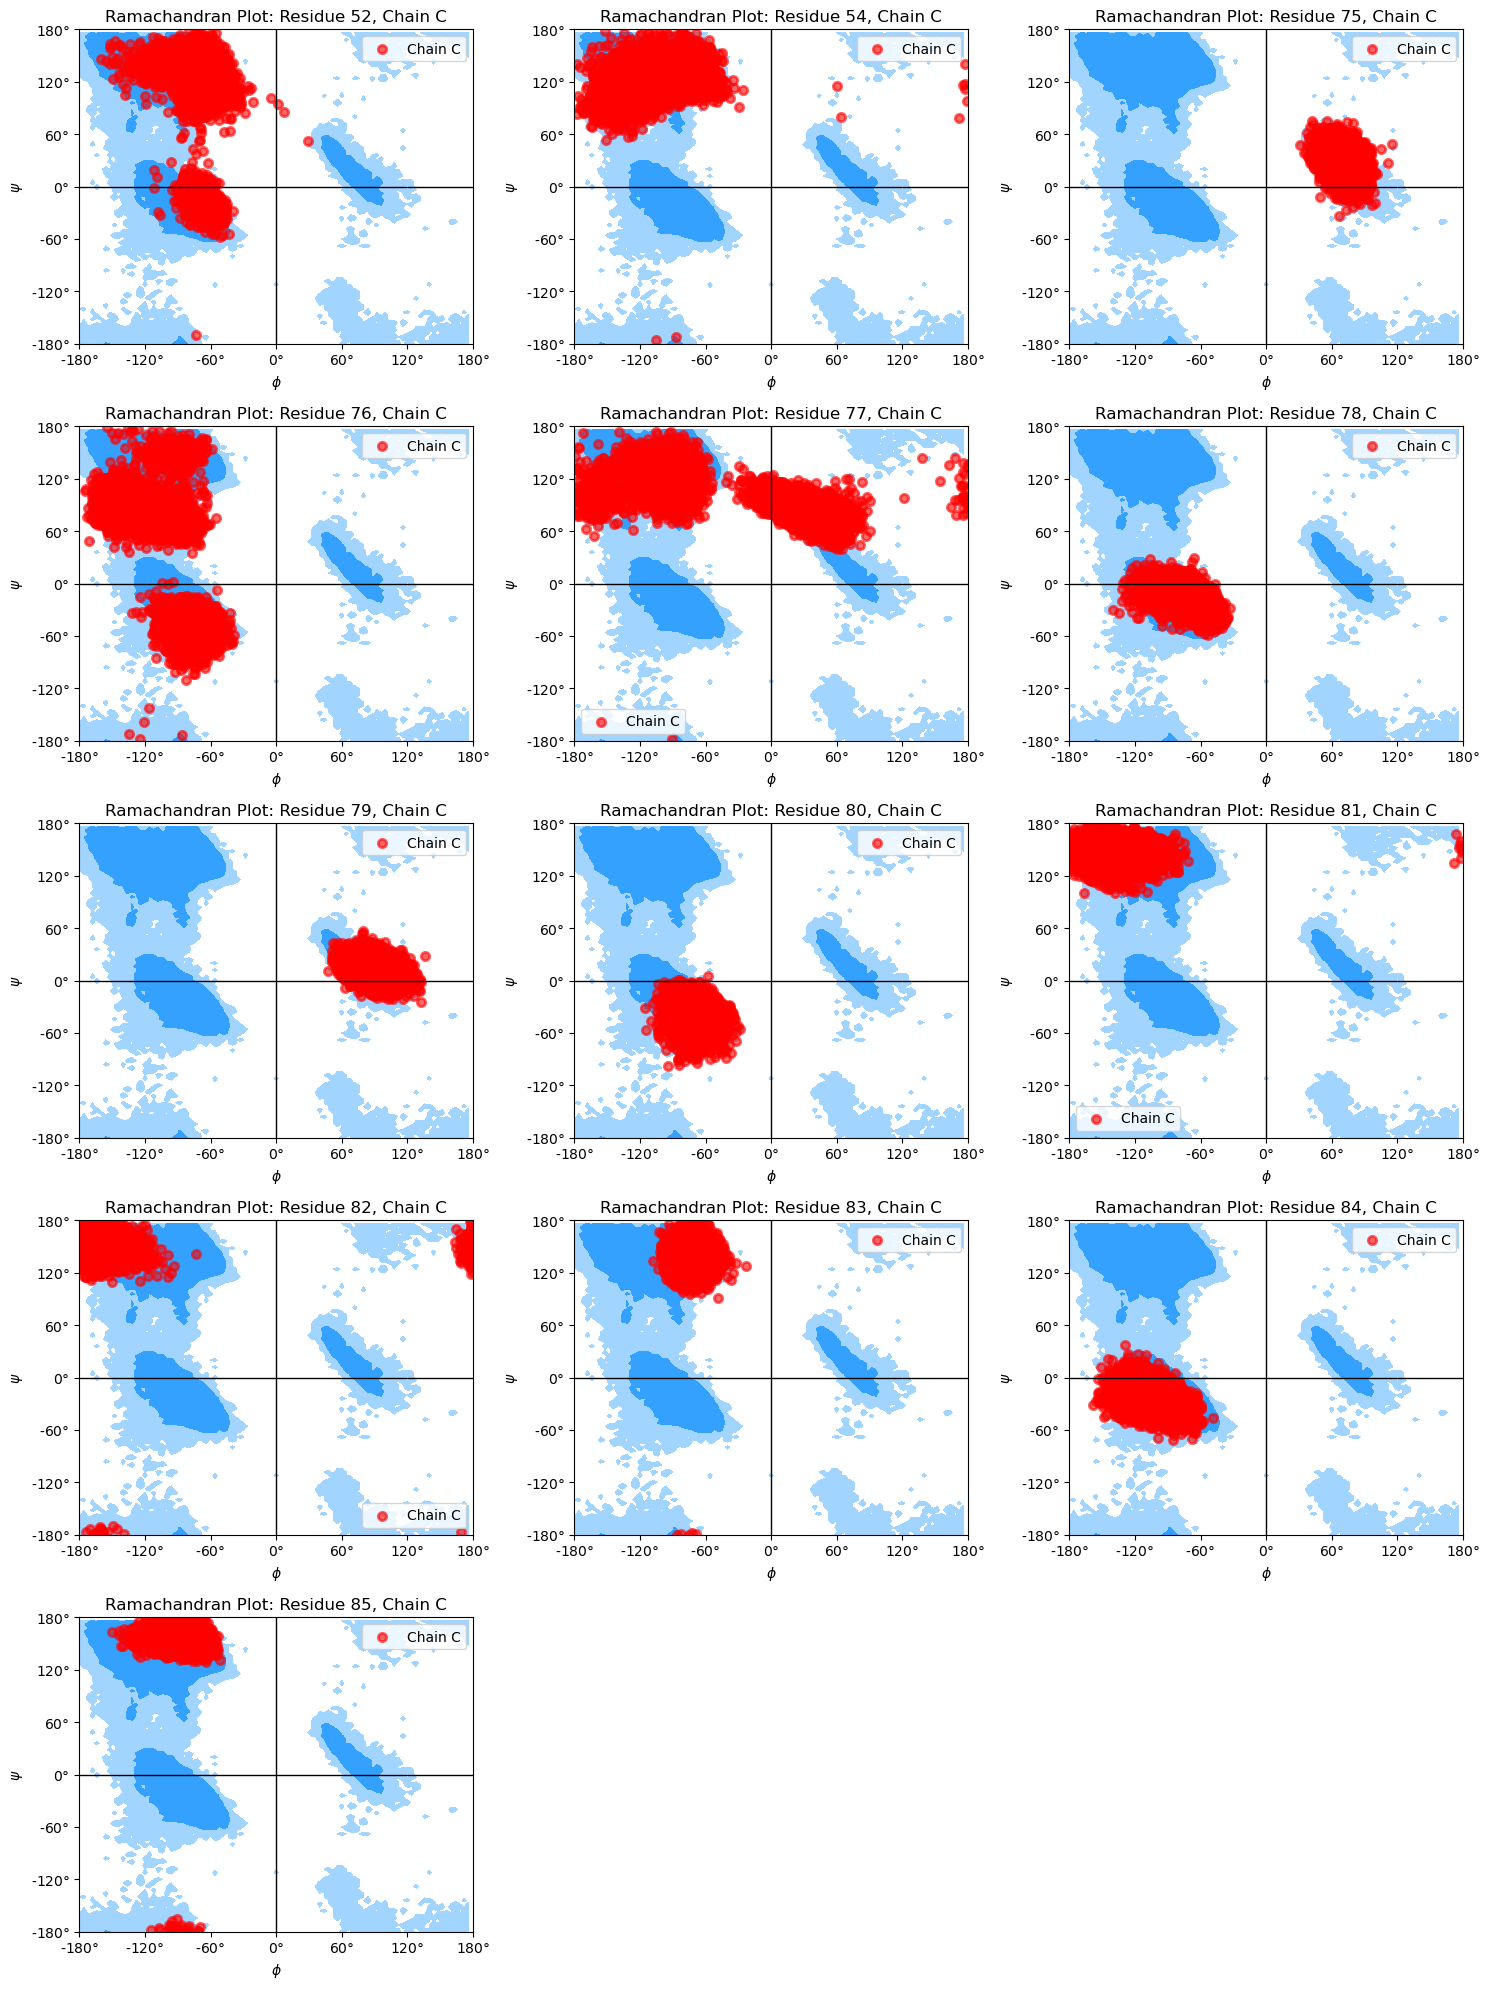

Combined plot saved as KcsA_Rama_plots_chainD/Combined_Ramachandran_1k4c.png


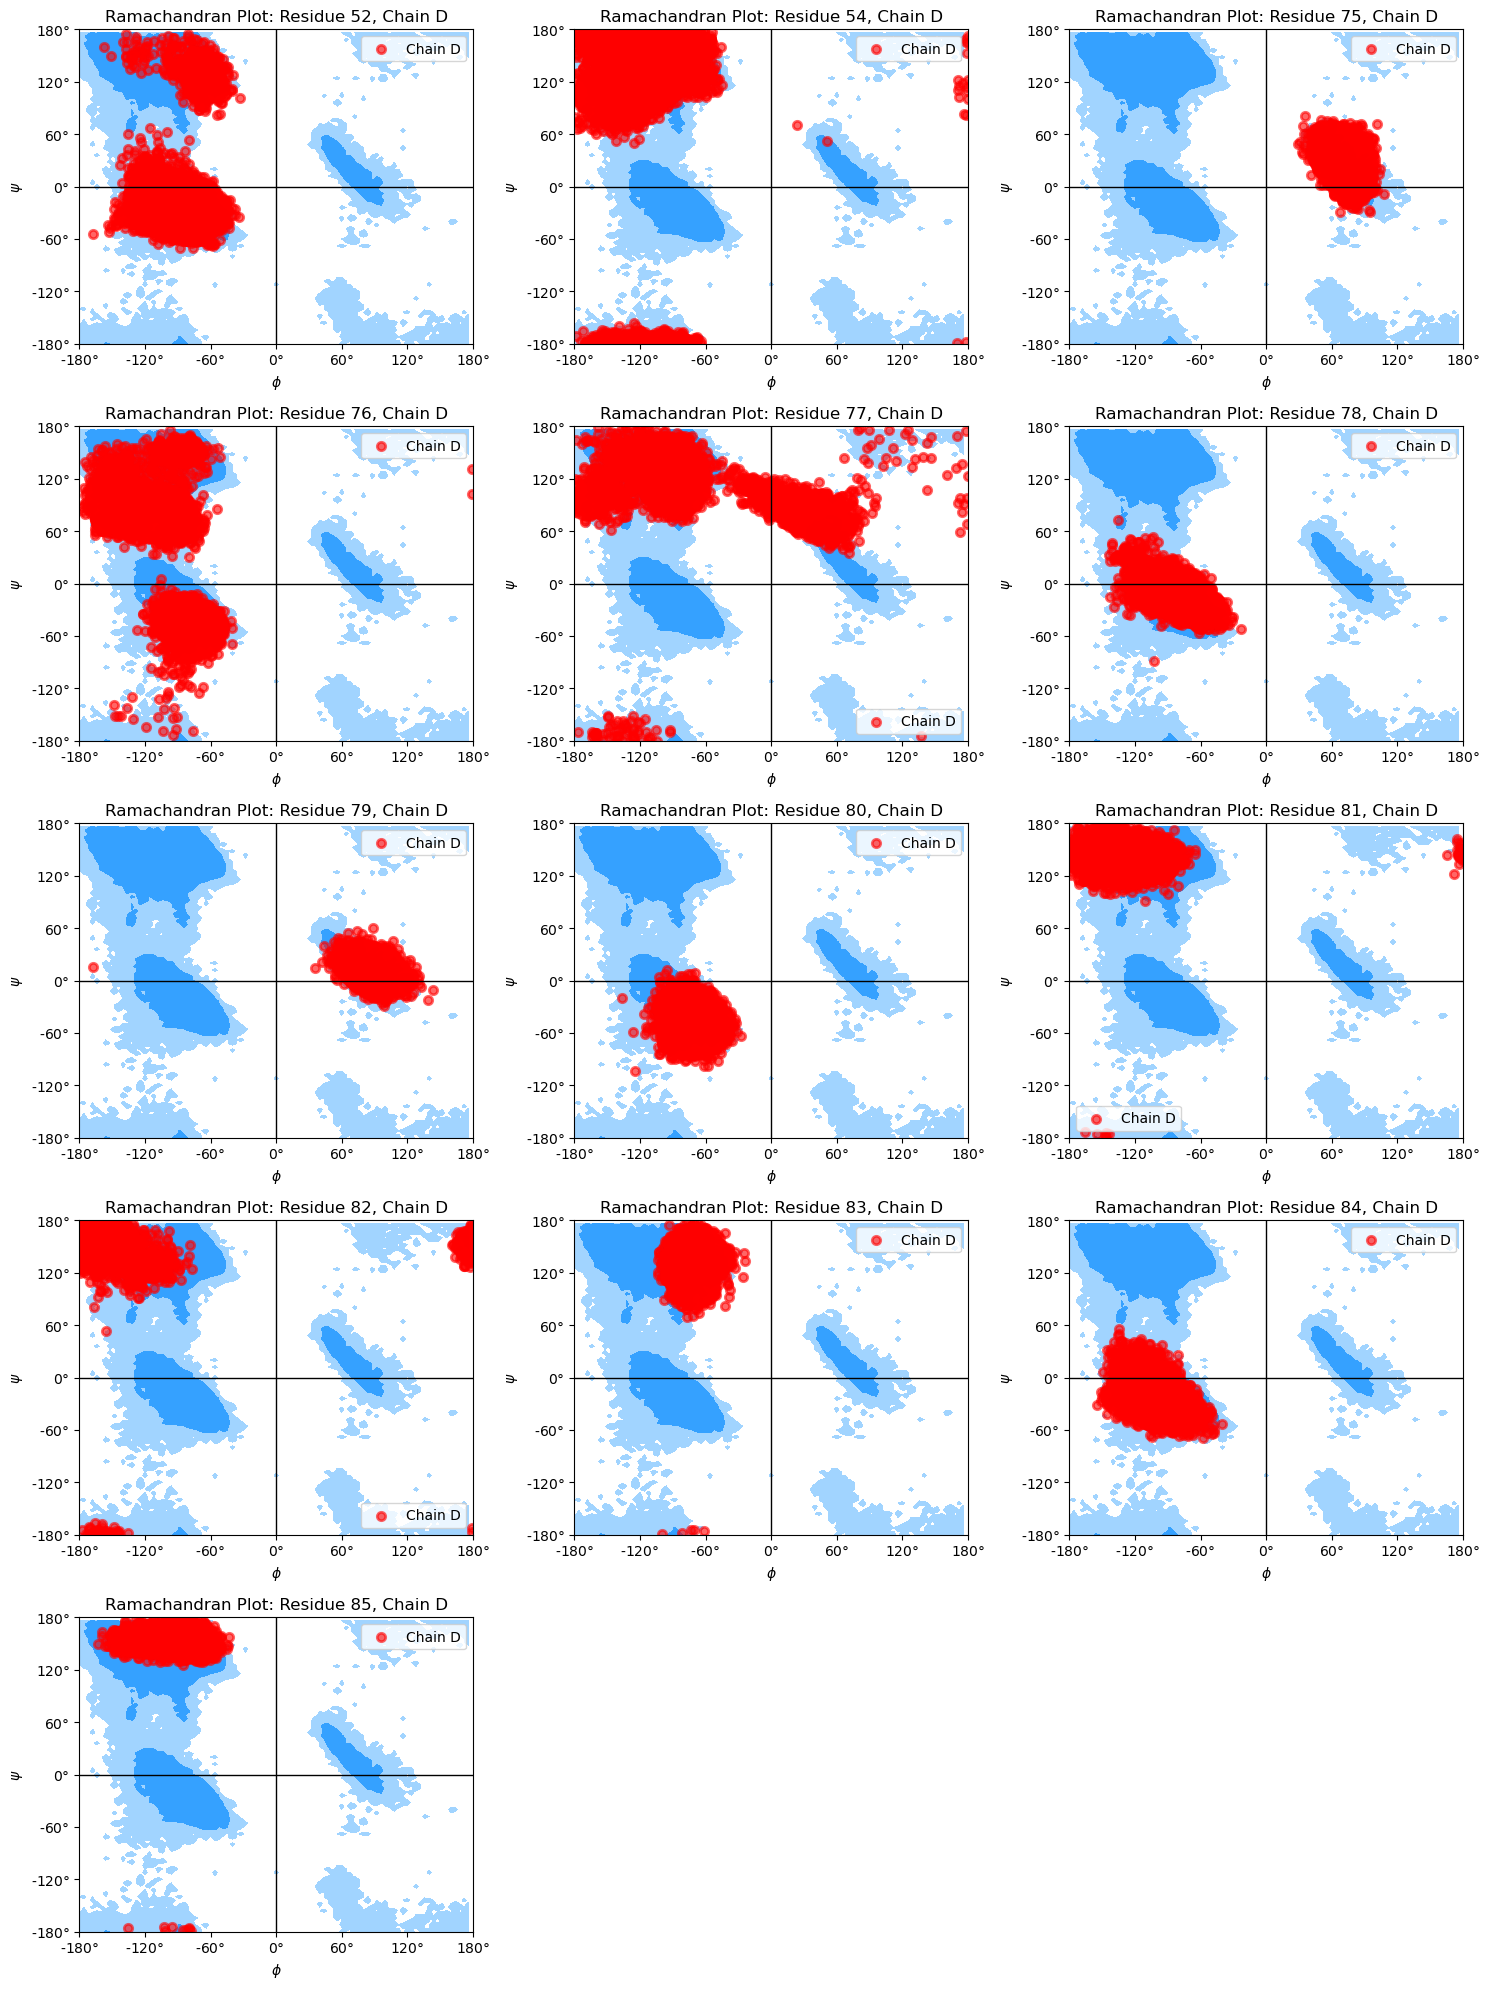

In [9]:
# plot residue torsion angles over Ramachandran plot
residues_to_plot=[52, 54, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
#chains=['A']
#DHFR_analyzer.plot_ramachandran(residue_index='23', PDB_code='1rx1', chain='A', output_dir='DHFR_Rama_plots2') 
for chain, i in zip(['A', 'B', 'C', 'D'], range(4)):
#for chain, i in zip(['D'], [3]):
    KcsA_analyzer[i].plot_all_ramachandran(residue_indices=residues_to_plot, PDB_code='1k4c', PDB_chain='C', chains=[chain], output_dir=f'KcsA_Rama_plots_chain{chain}')

Combined plot saved as KcsA_scatter_plots_ChainA/inter_intra_torsion_scatter_52.png


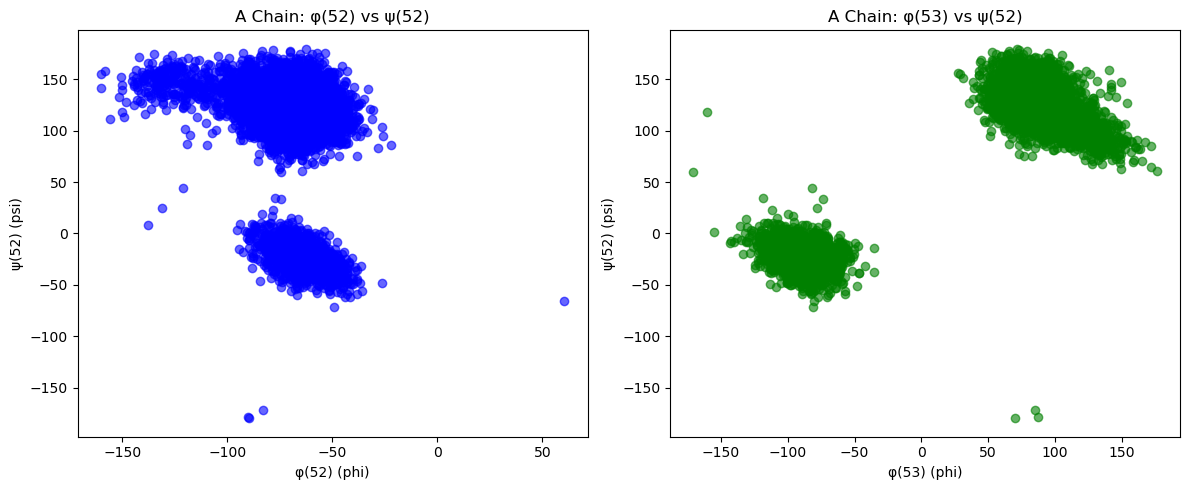

Combined plot saved as KcsA_scatter_plots_ChainA/inter_intra_torsion_scatter_76.png


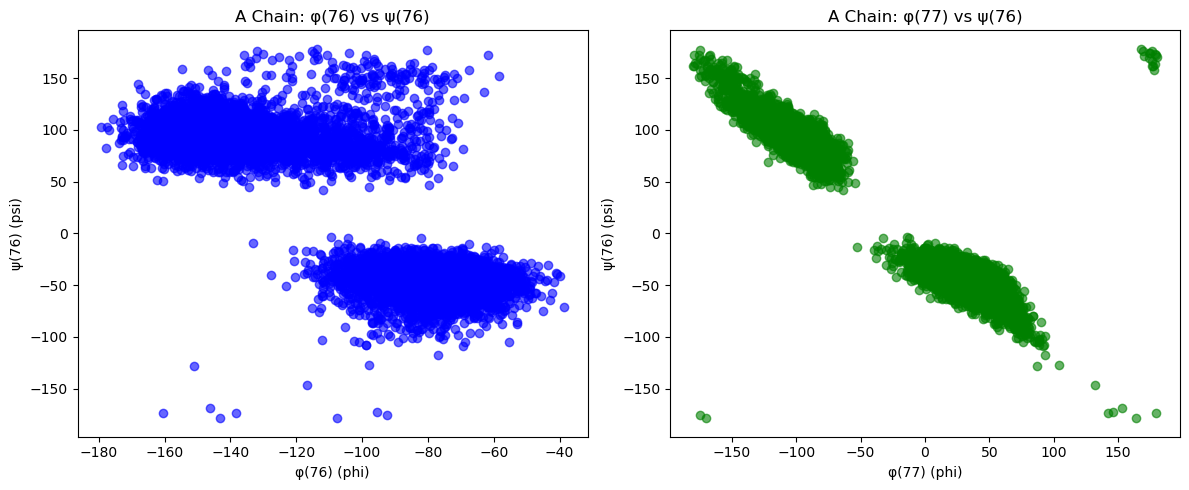

Combined plot saved as KcsA_scatter_plots_ChainA/inter_intra_torsion_scatter_77.png


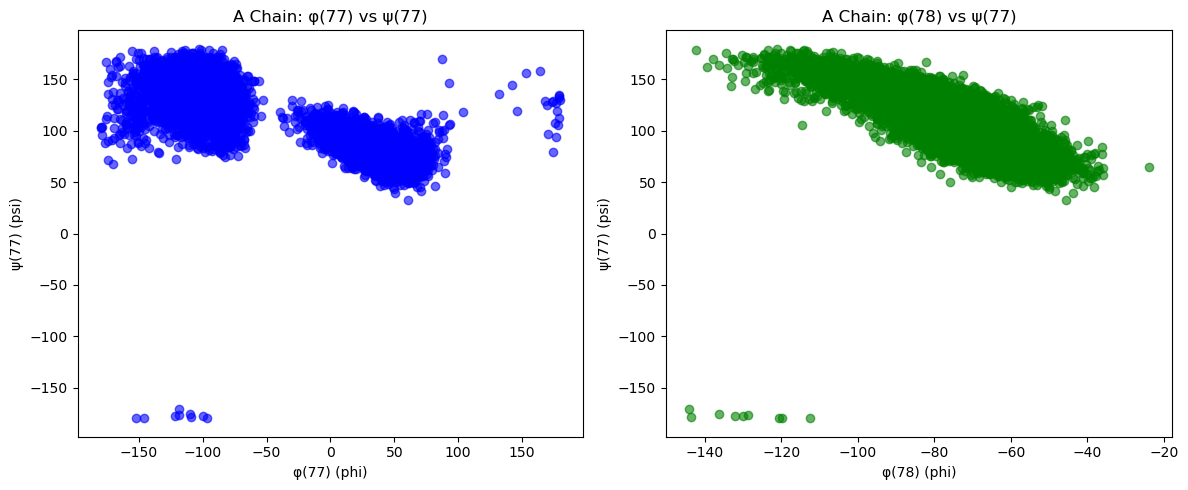

In [10]:
residues_to_plot=[52,76, 77]
for residue in residues_to_plot:
    KcsA_analyzer[0].plot_scatter(residue, chains='A', output_dir='KcsA_scatter_plots_ChainA')

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_52.png


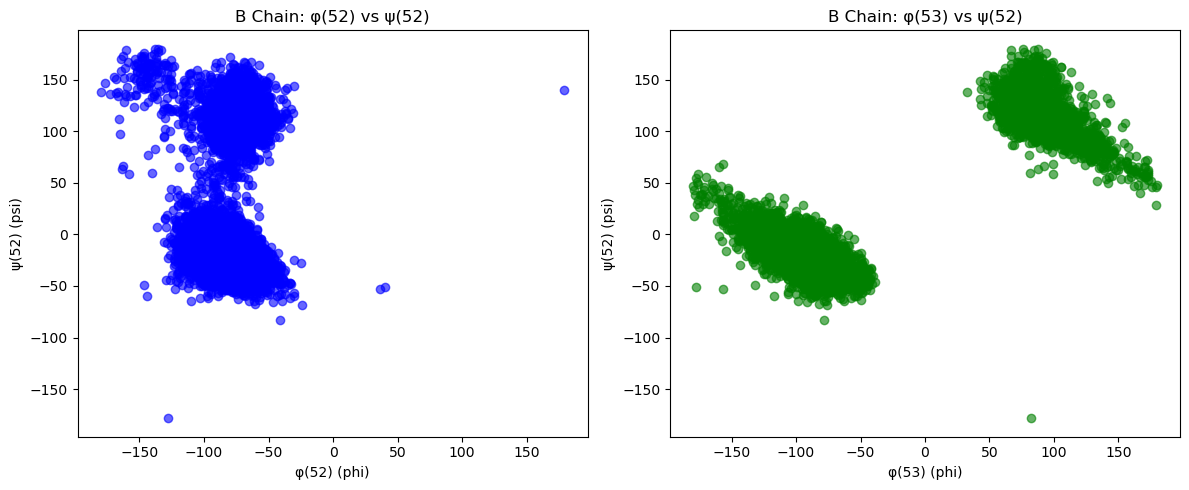

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_76.png


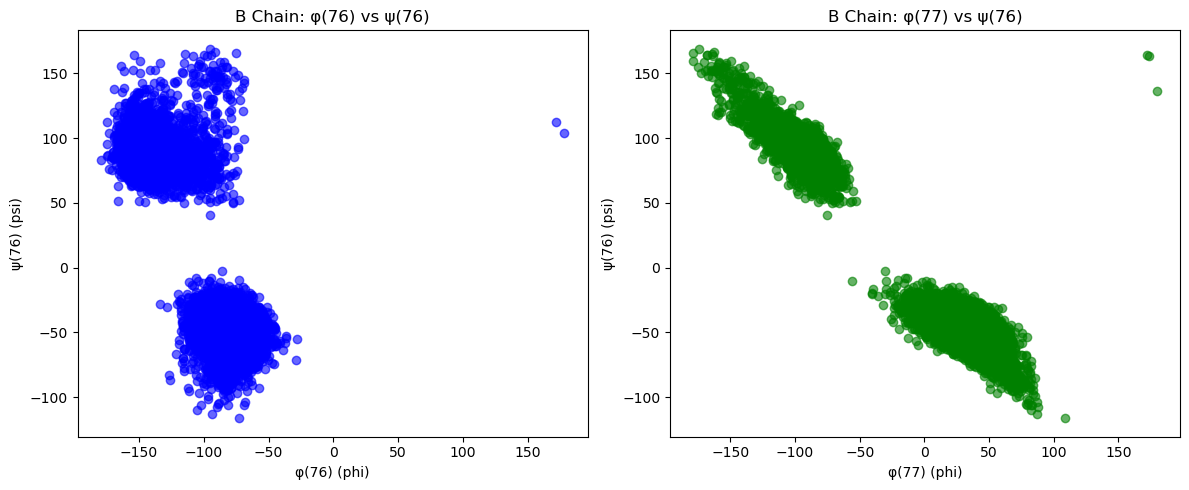

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_77.png


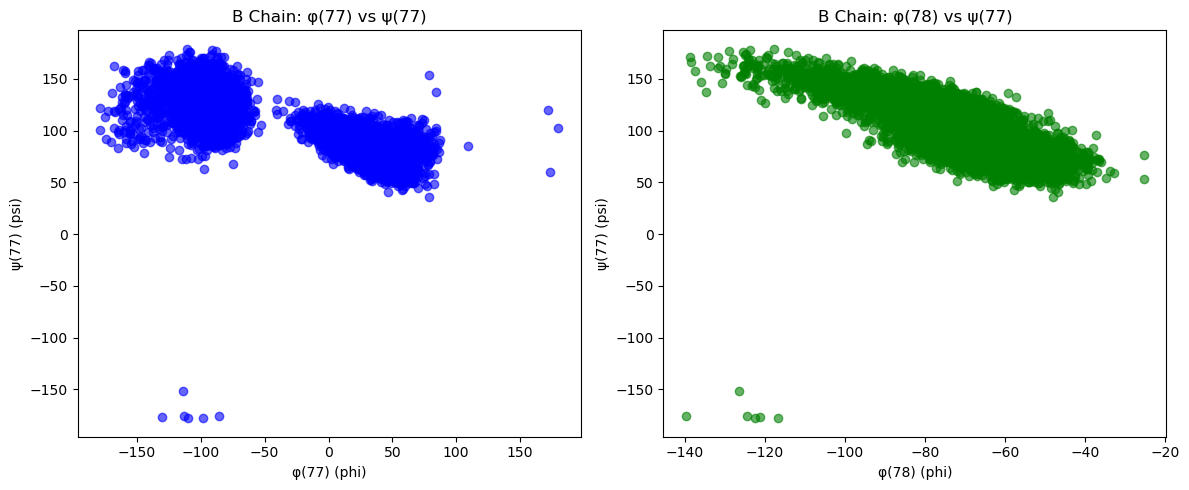

In [11]:
residues_to_plot=[52, 76, 77]
for residue in residues_to_plot:
    KcsA_analyzer[1].plot_scatter(residue, chains='B', output_dir='KcssA_scatter_plots_ChainB')

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_52.png


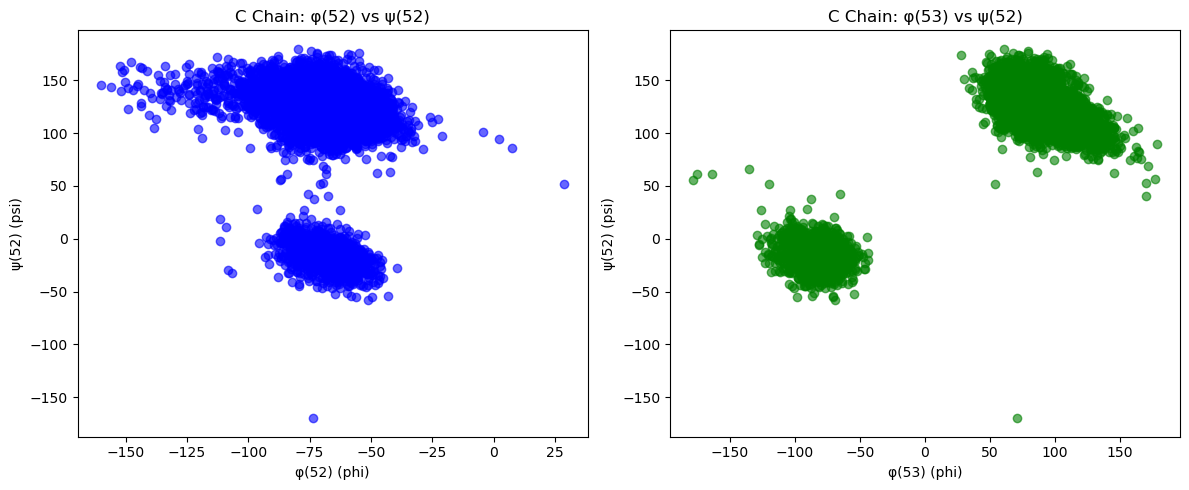

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_76.png


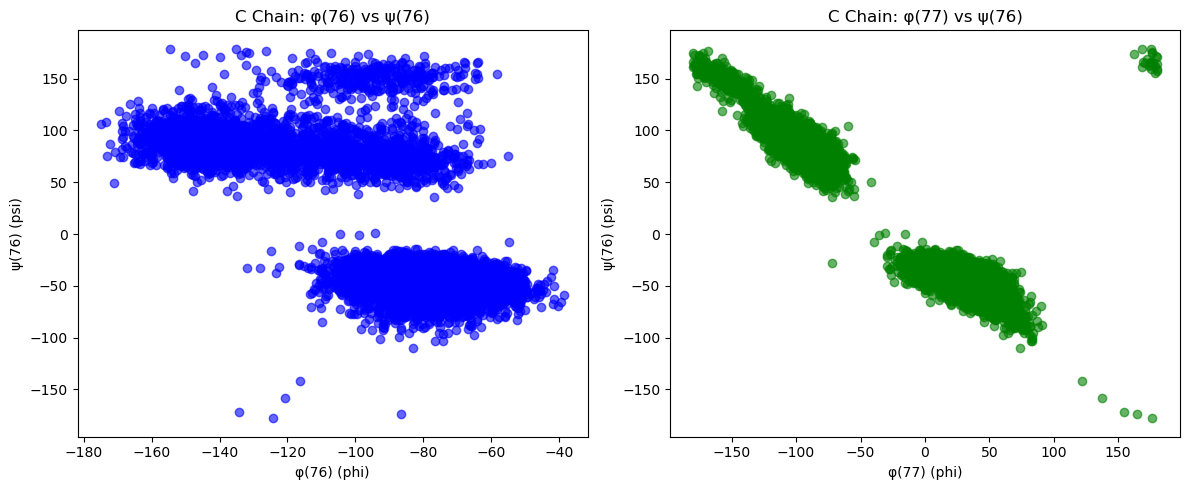

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_77.png


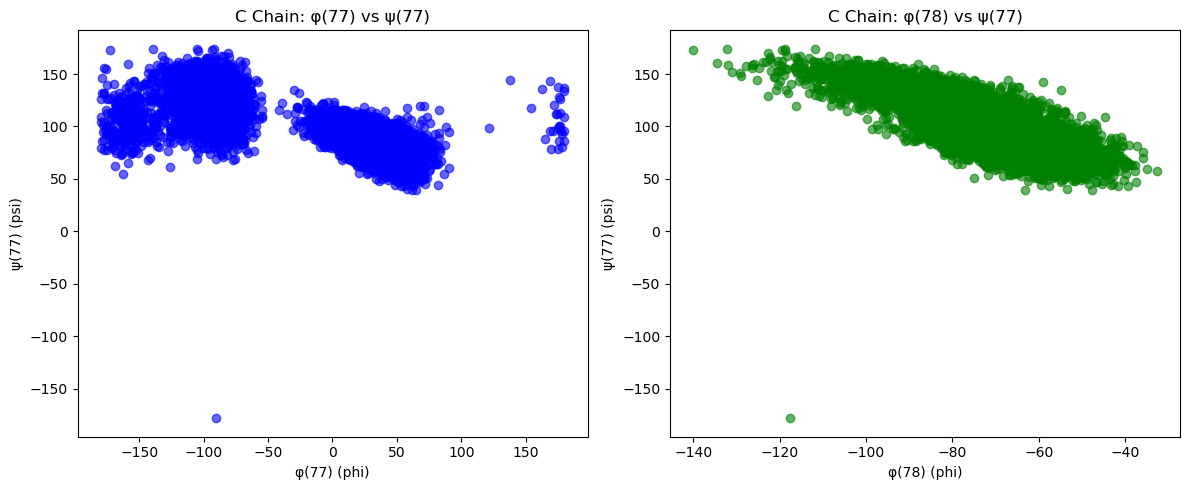

In [12]:
residues_to_plot=[52, 76, 77]
for residue in residues_to_plot:
    KcsA_analyzer[2].plot_scatter(residue, chains='C', output_dir='KcssA_scatter_plots_ChainC')

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_52.png


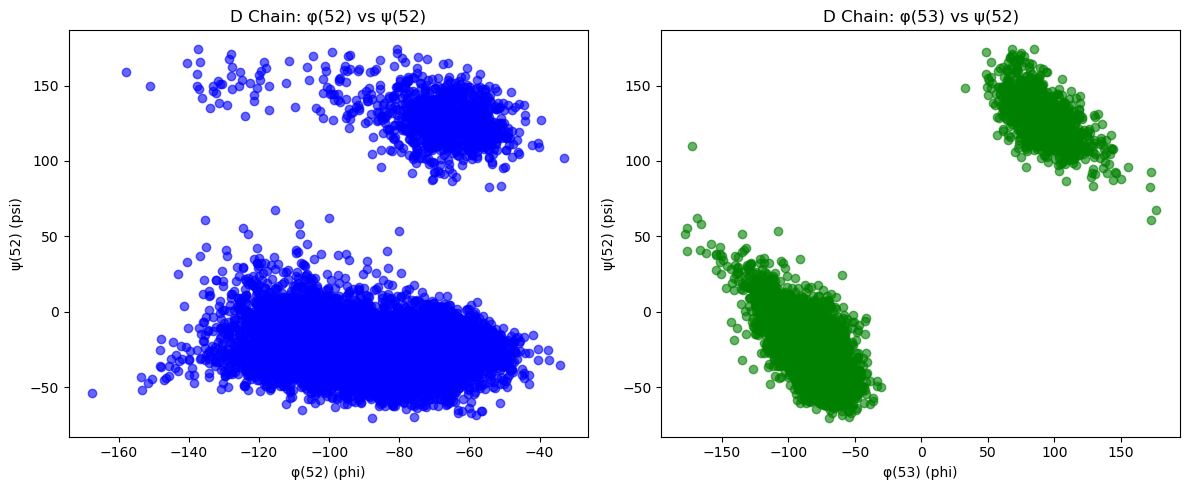

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_54.png


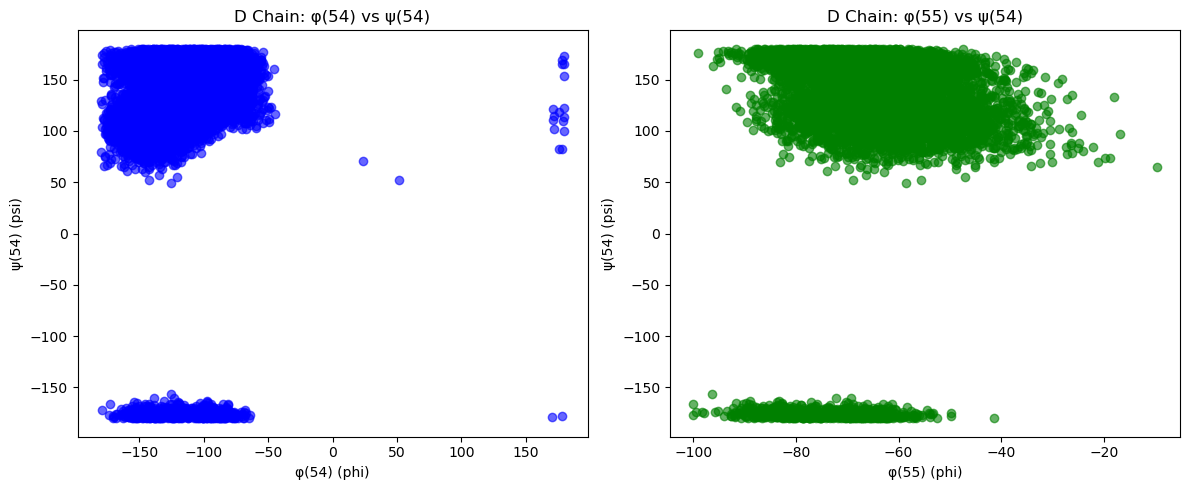

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_76.png


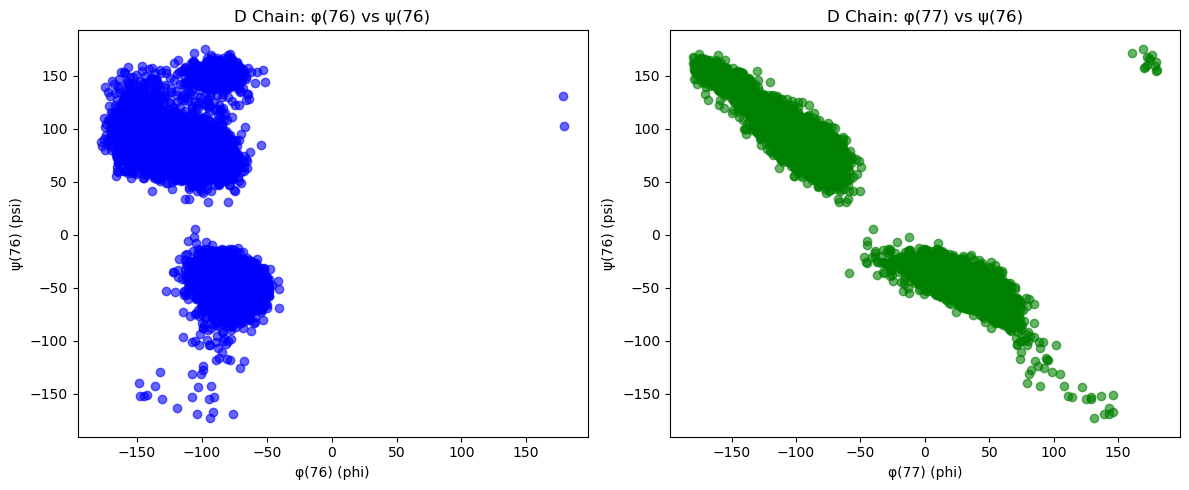

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_77.png


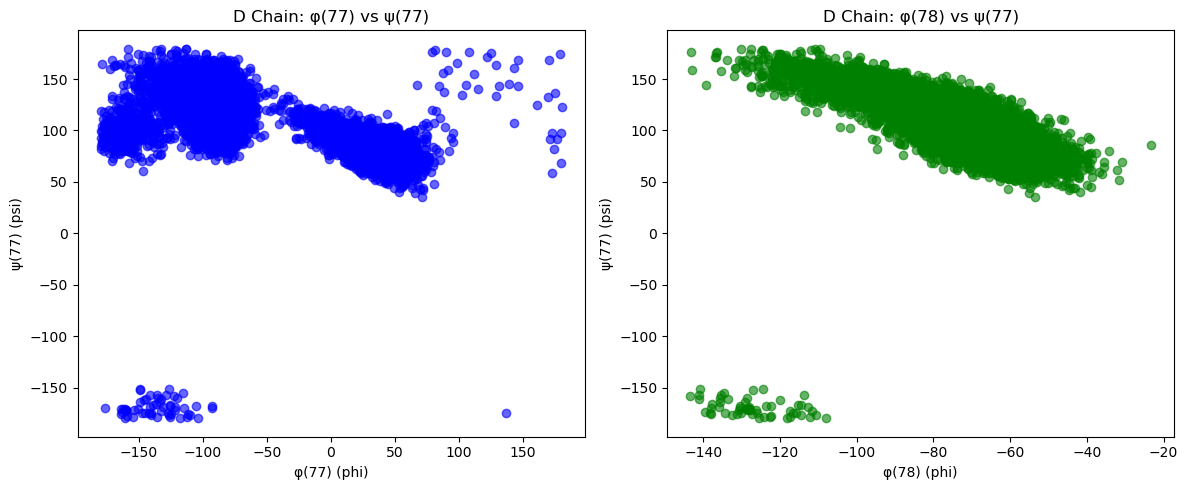

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_78.png


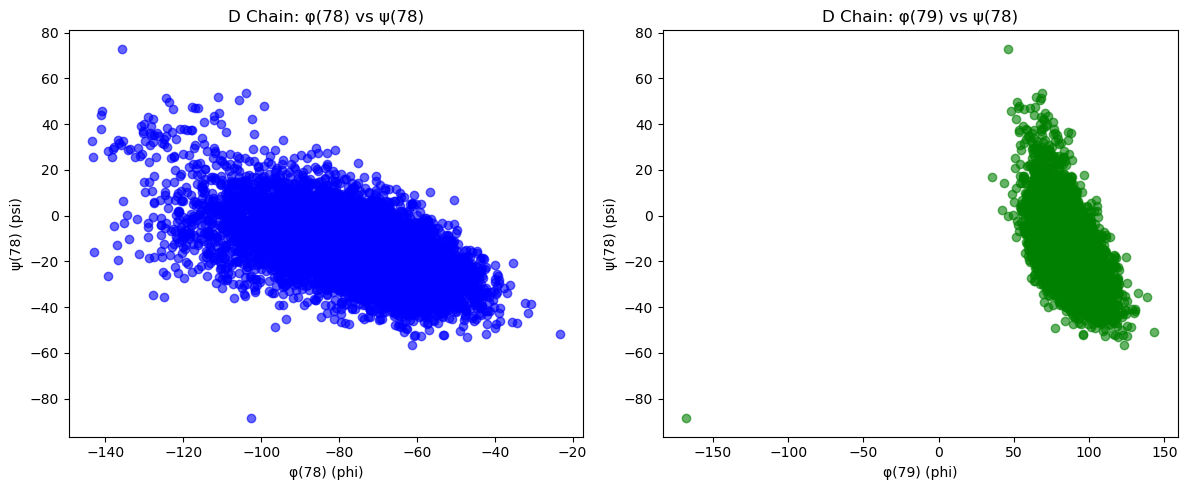

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_79.png


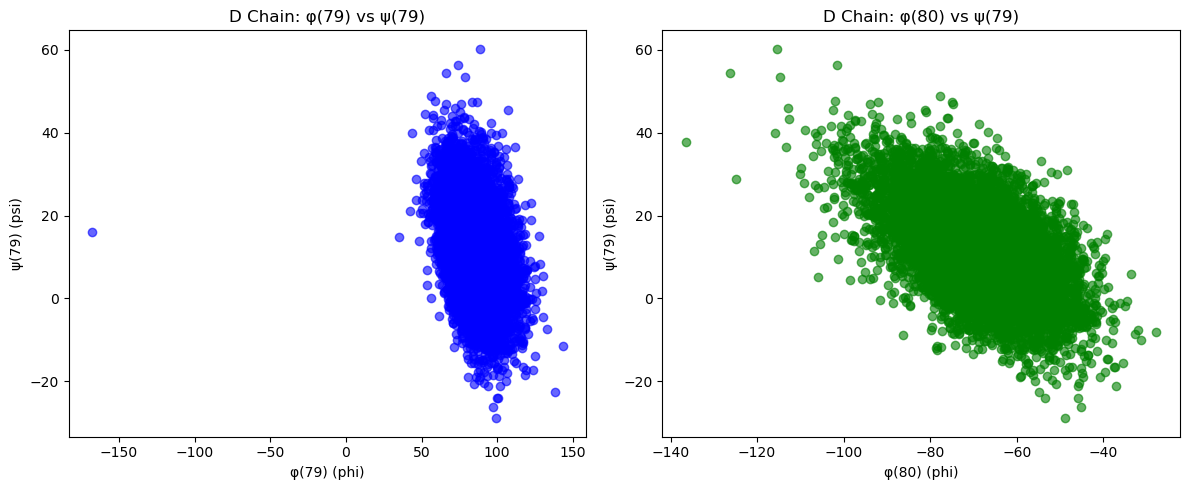

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_80.png


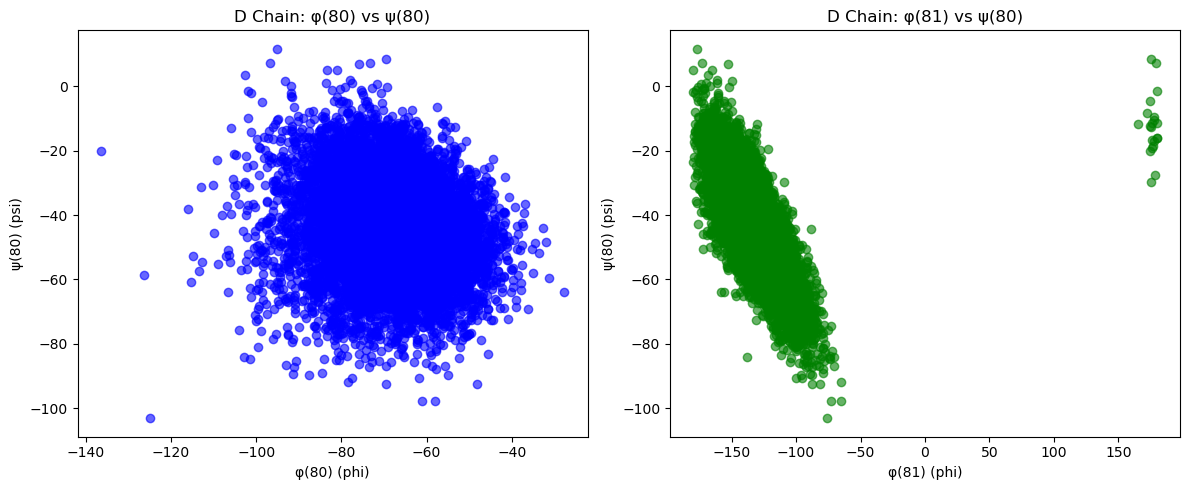

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_81.png


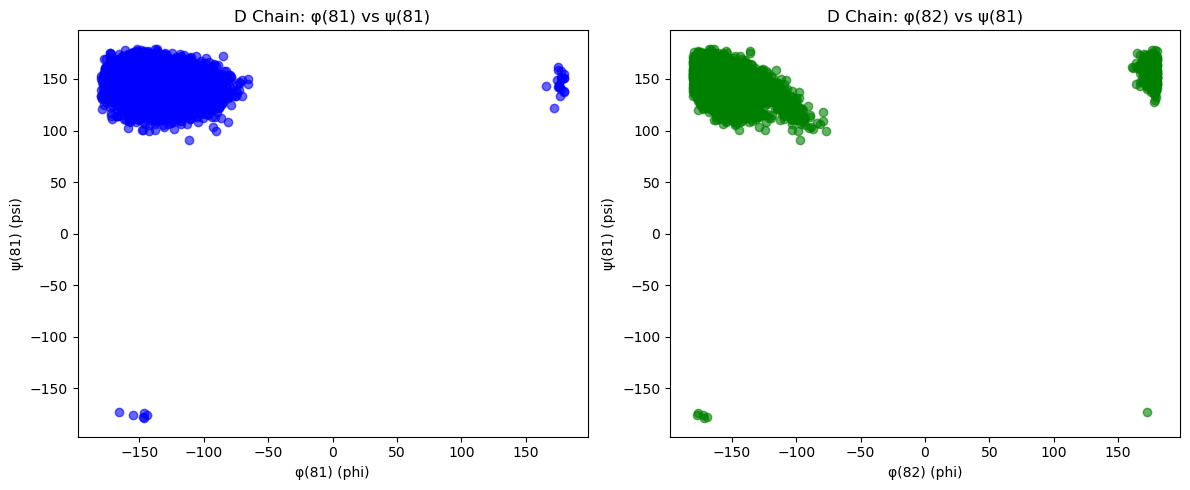

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_82.png


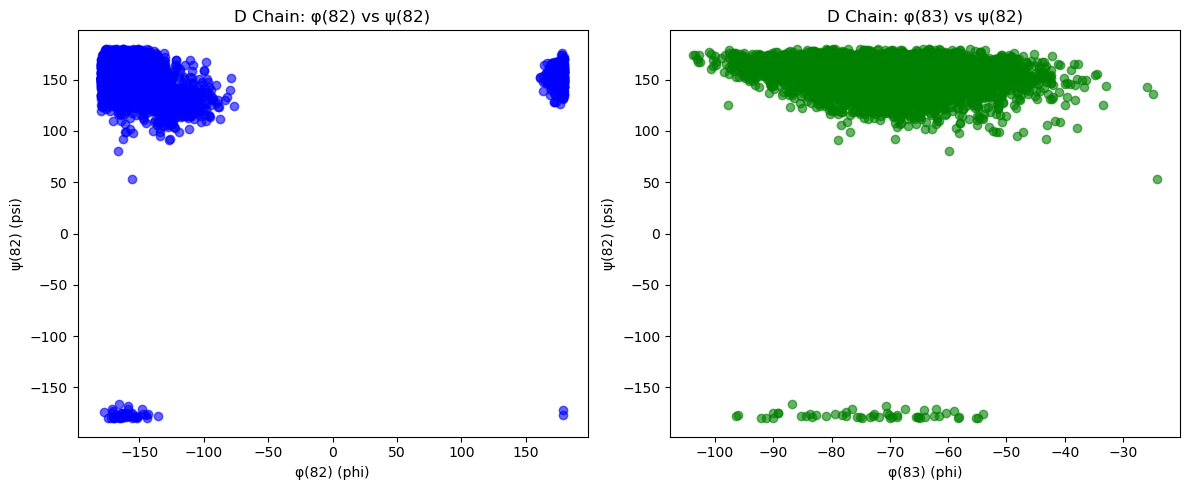

In [13]:
residues_to_plot=[52, 54, 76,77, 78, 79, 80,81, 82]
for residue in residues_to_plot:
    KcsA_analyzer[3].plot_scatter(residue, chains='D', output_dir='KcssA_scatter_plots_ChainD')

Plot saved as KcsA_torsion_vs_time_ChainA/Torsion_vs_Time_Residue_52_Chain_A.png


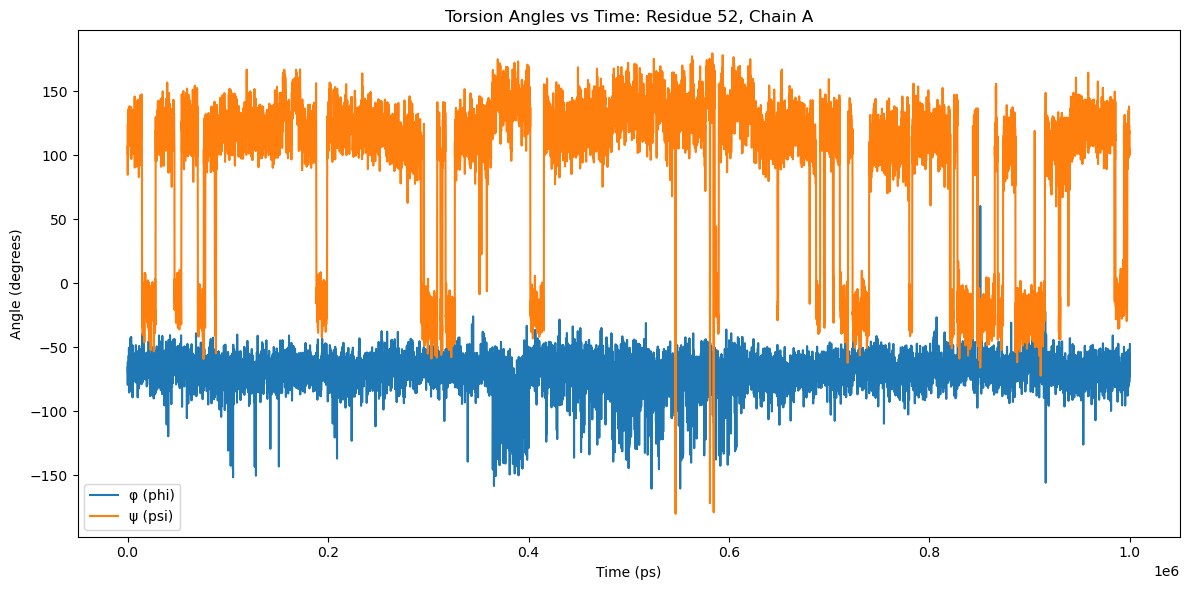

Plot saved as KcsA_inter_torsion_vs_time_ChainA/Inter_Torsion_vs_Time_Residue_52_Chain_A.png


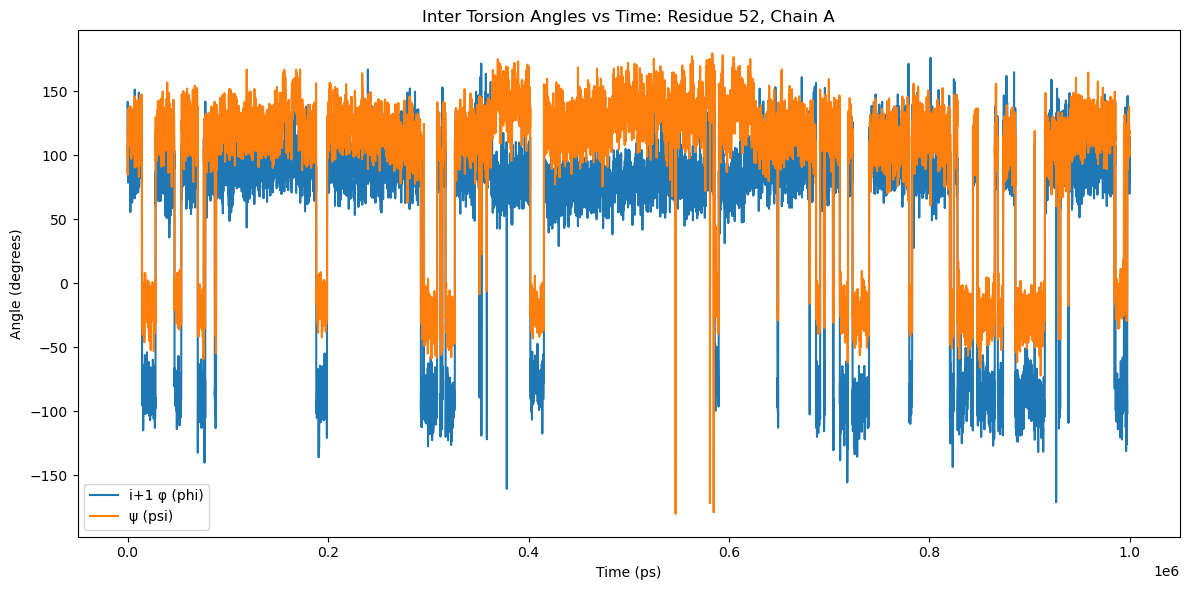

Plot saved as KcsA_torsion_vs_time_ChainA/Torsion_vs_Time_Residue_76_Chain_A.png


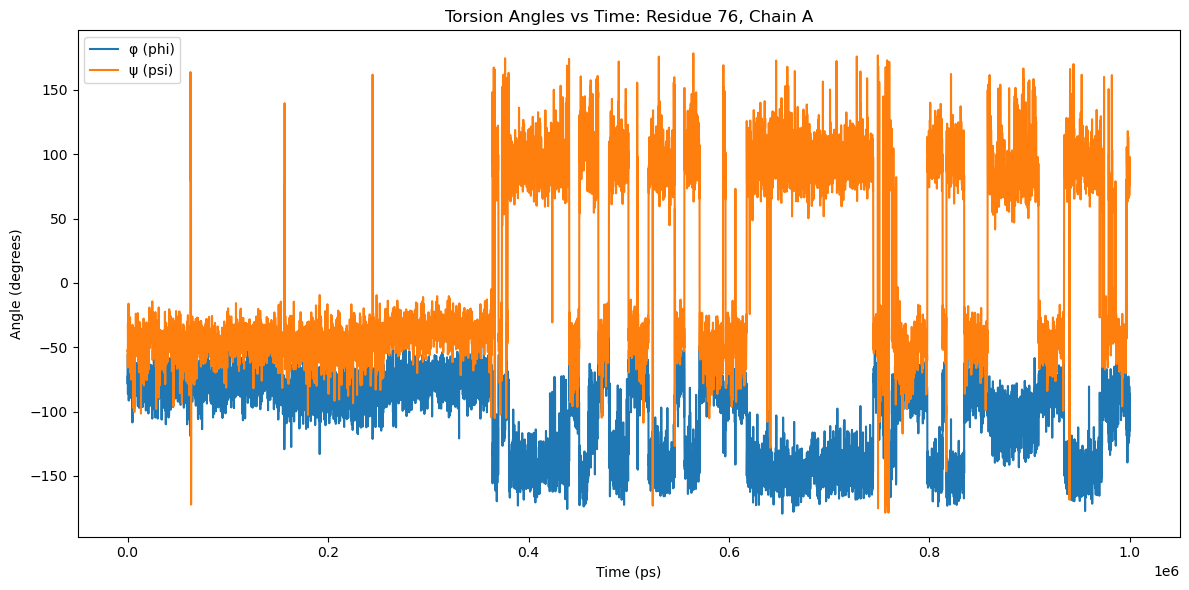

Plot saved as KcsA_inter_torsion_vs_time_ChainA/Inter_Torsion_vs_Time_Residue_76_Chain_A.png


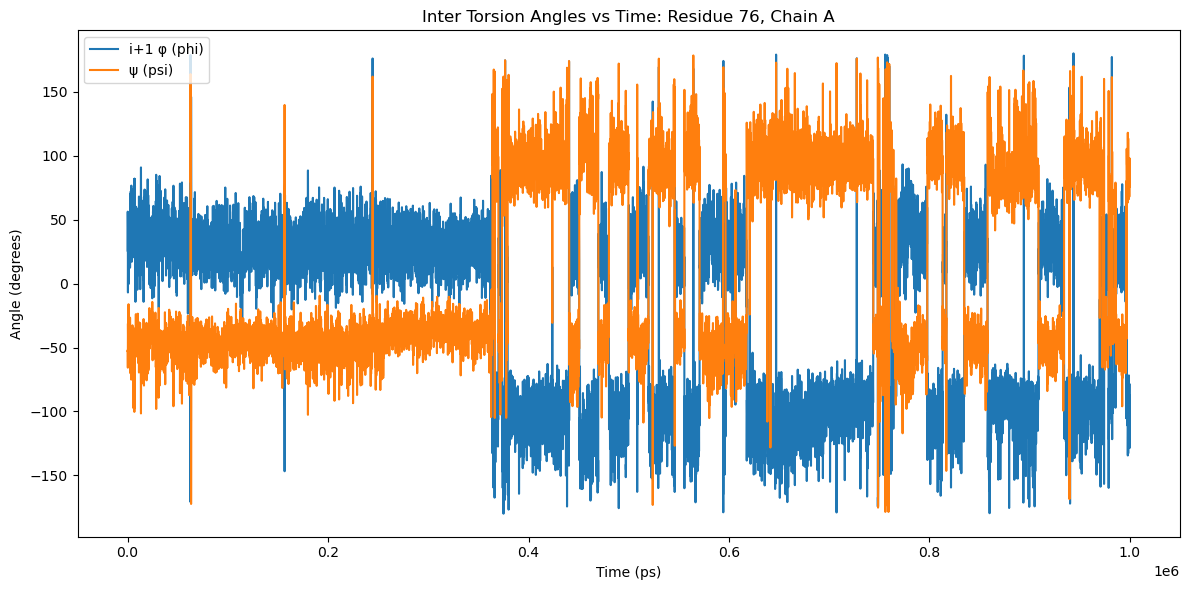

Plot saved as KcsA_torsion_vs_time_ChainA/Torsion_vs_Time_Residue_77_Chain_A.png


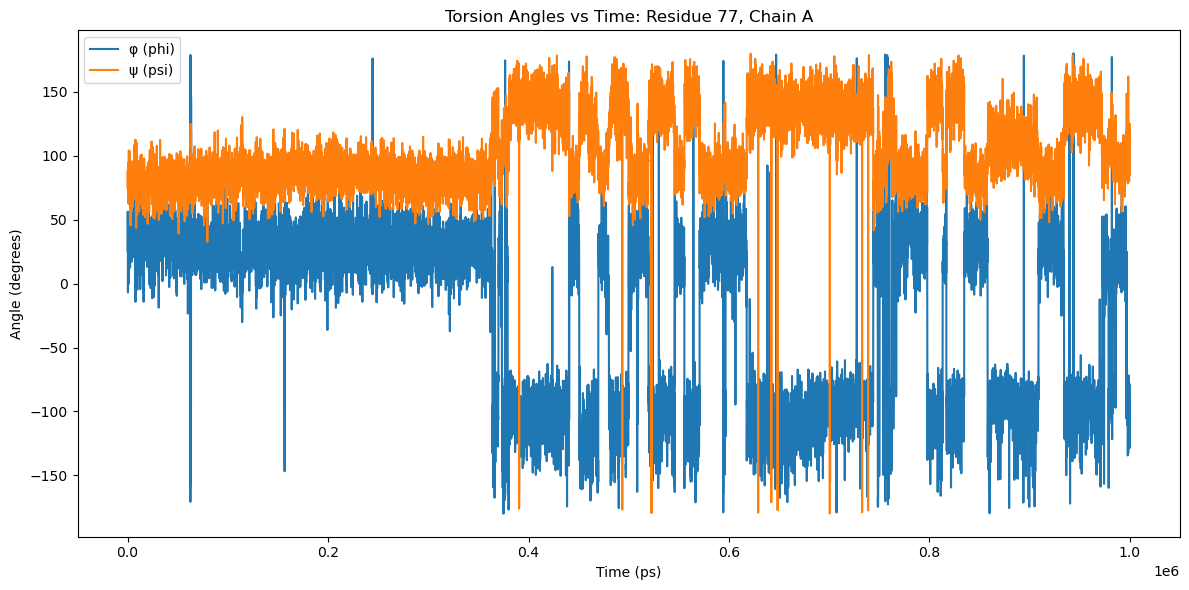

Plot saved as KcsA_inter_torsion_vs_time_ChainA/Inter_Torsion_vs_Time_Residue_77_Chain_A.png


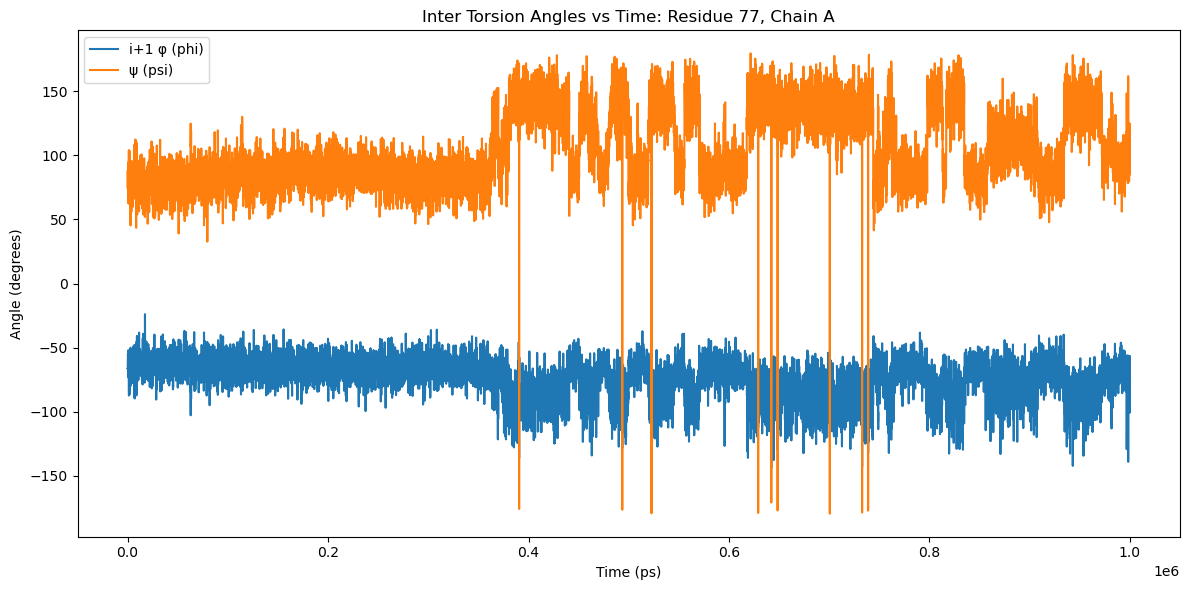

In [14]:
from torsion_analysis_module2 import *
# import plot functions to plot torsion angles(intra and inter) vs time 

# plot the torsion angles over time
residues_to_plot=[52, 76, 77]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='A', analyzer=KcsA_analyzer[0], output_dir='KcsA_torsion_vs_time_ChainA')
    plot_inter_torsion_vs_time(residue=residue, chain='A', analyzer=KcsA_analyzer[0], output_dir='KcsA_inter_torsion_vs_time_ChainA')

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_52_Chain_B.png


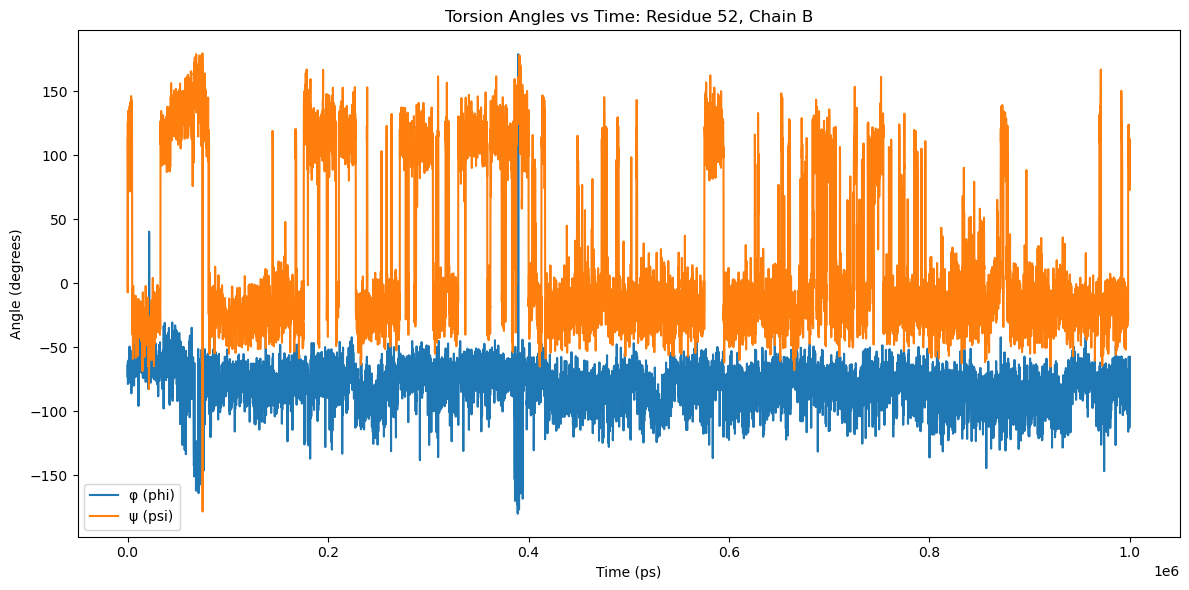

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_52_Chain_B.png


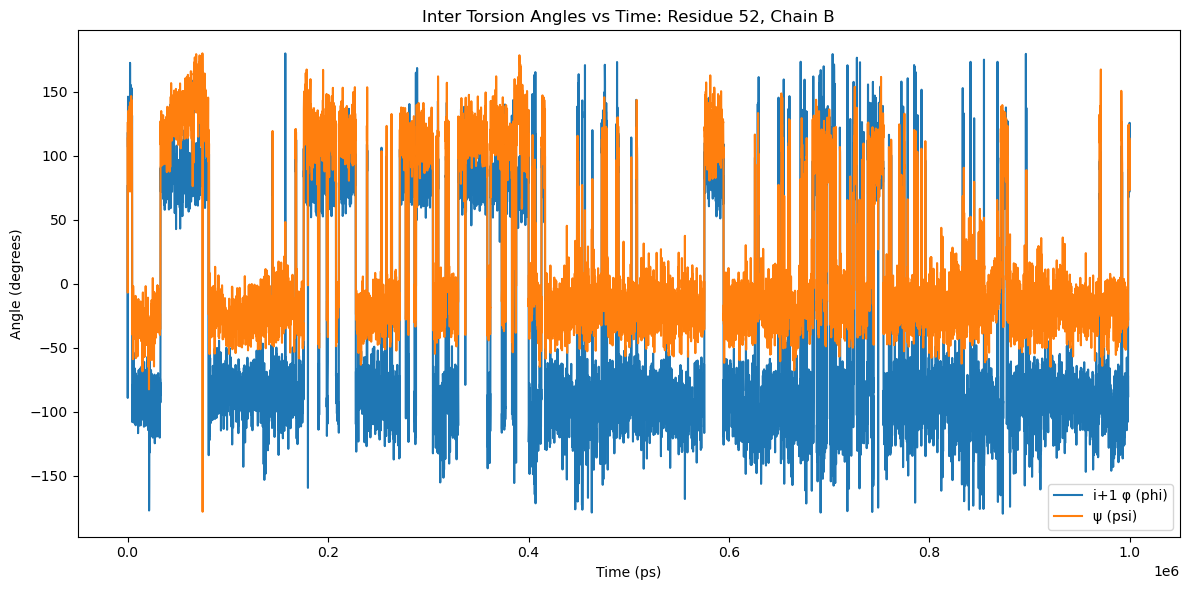

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_76_Chain_B.png


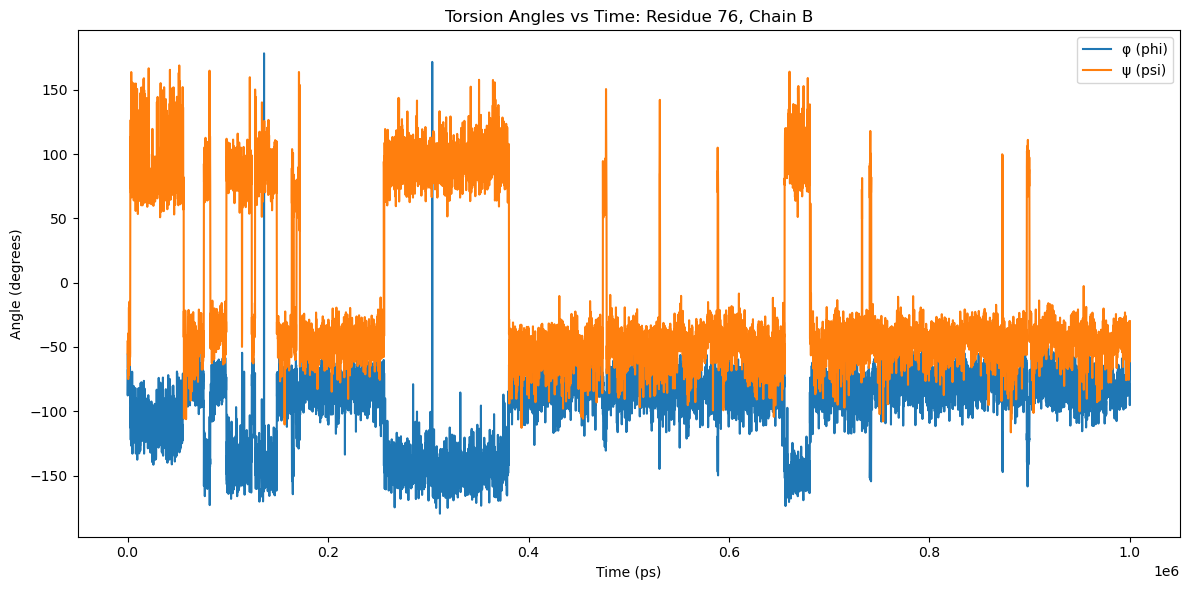

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_76_Chain_B.png


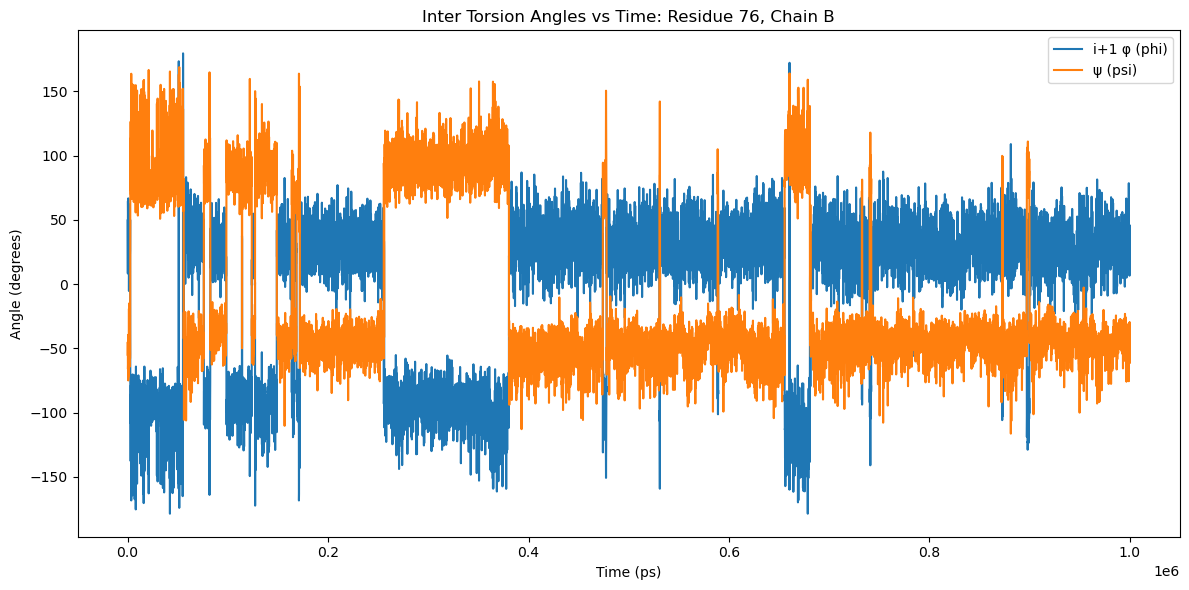

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_77_Chain_B.png


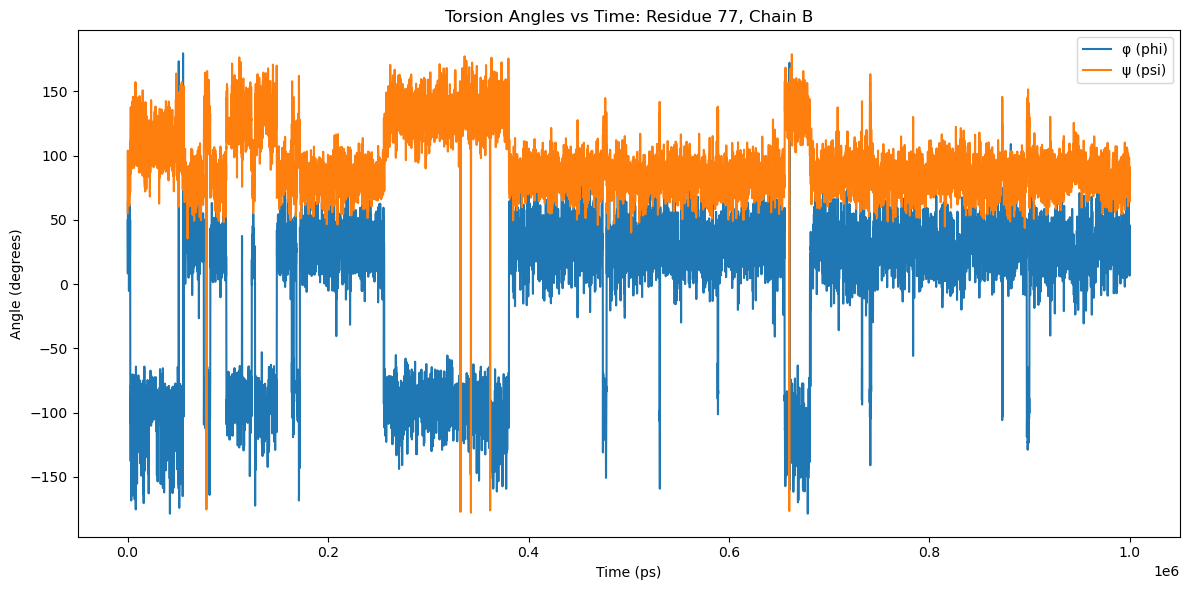

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_77_Chain_B.png


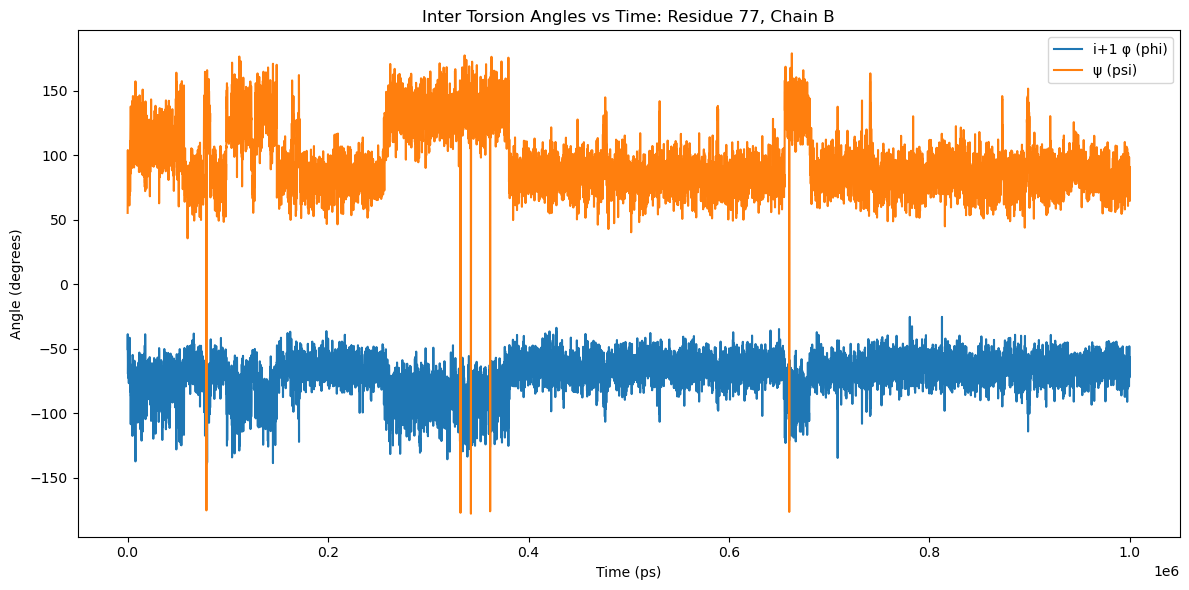

In [15]:
residues_to_plot=[52, 76, 77]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='B', analyzer=KcsA_analyzer[1], output_dir='KcsA_torsion_vs_time_ChainB')
    plot_inter_torsion_vs_time(residue=residue, chain='B', analyzer=KcsA_analyzer[1], output_dir='KcsA_inter_torsion_vs_time_ChainB')

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_52_Chain_C.png


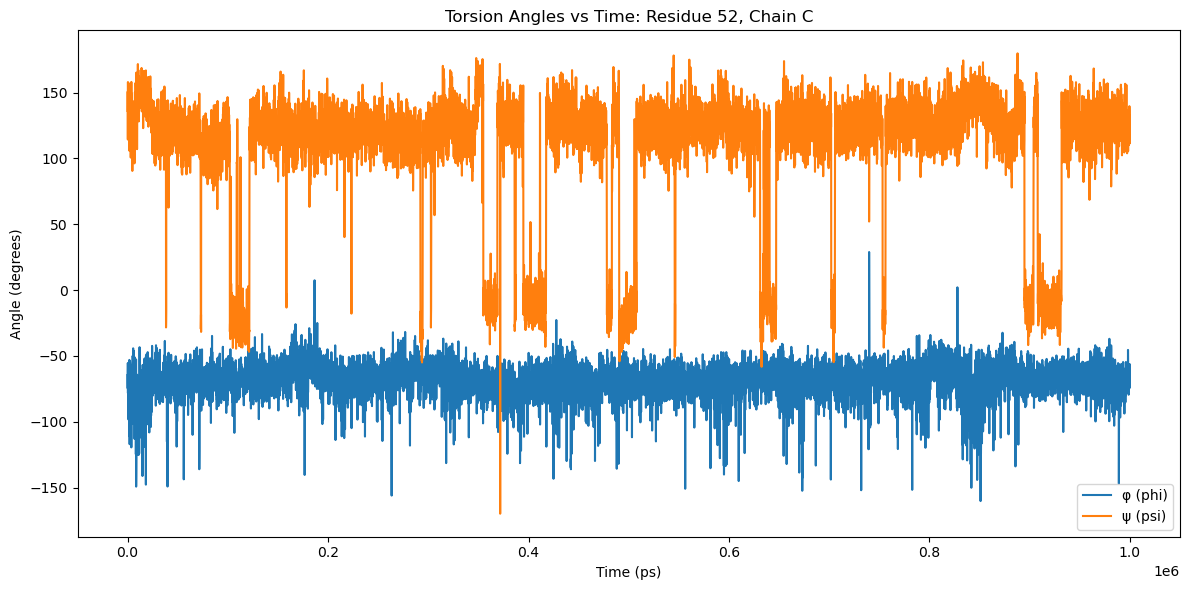

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_52_Chain_C.png


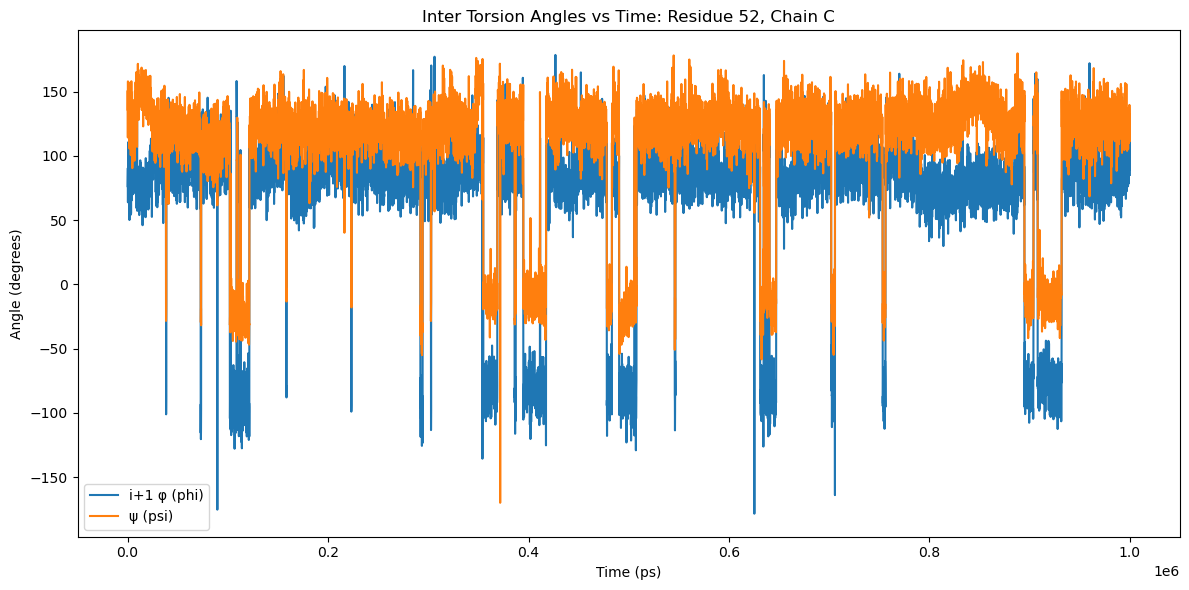

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_76_Chain_C.png


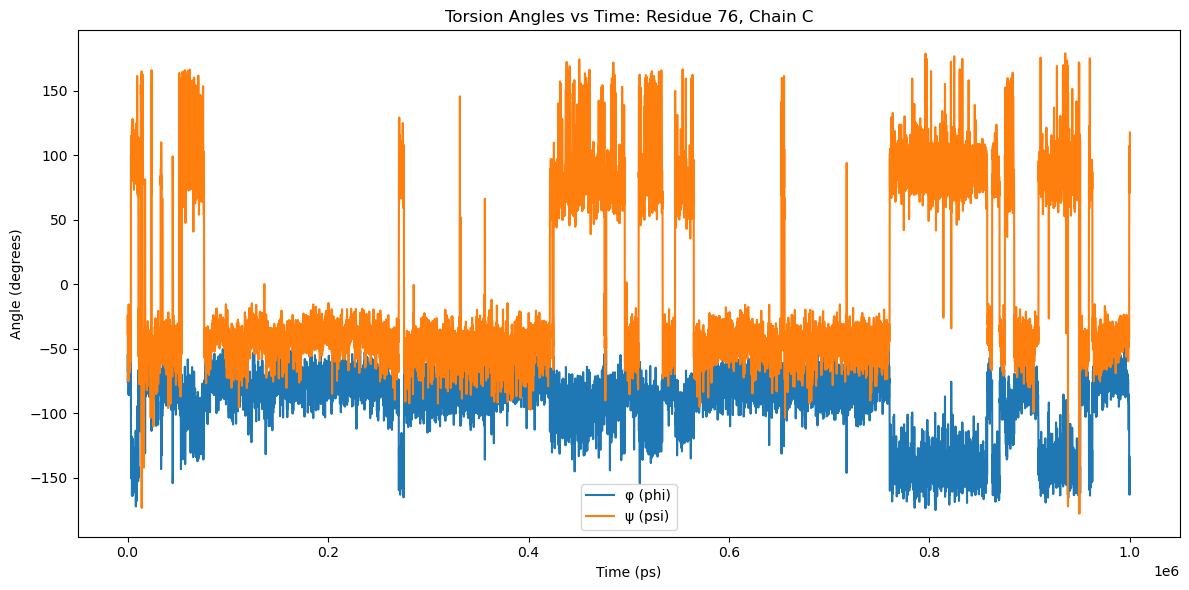

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_76_Chain_C.png


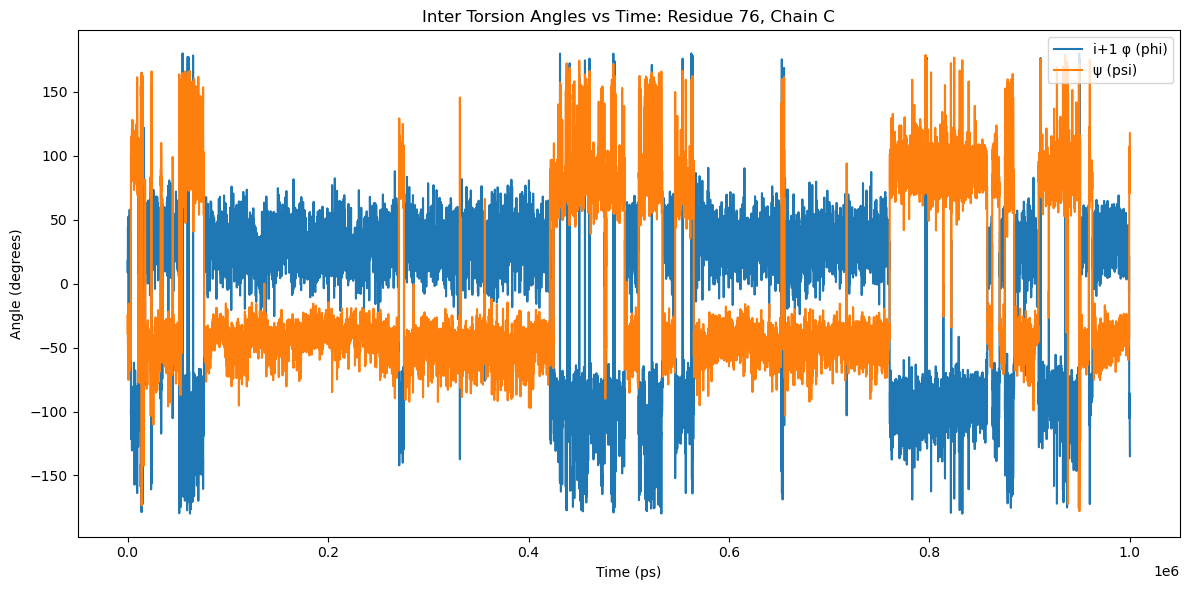

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_77_Chain_C.png


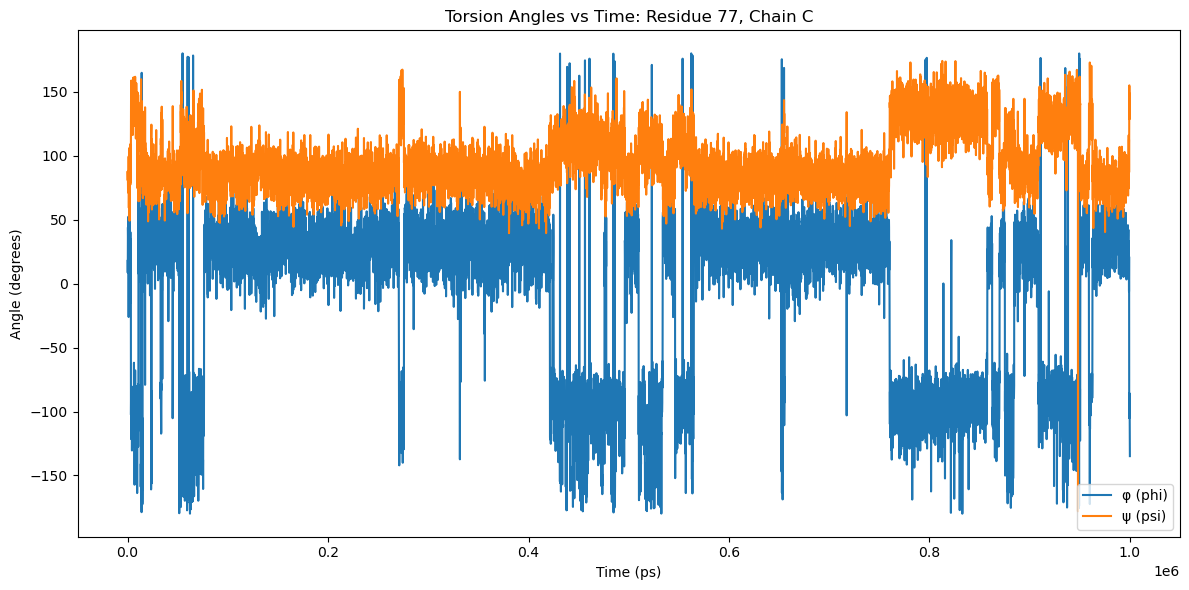

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_77_Chain_C.png


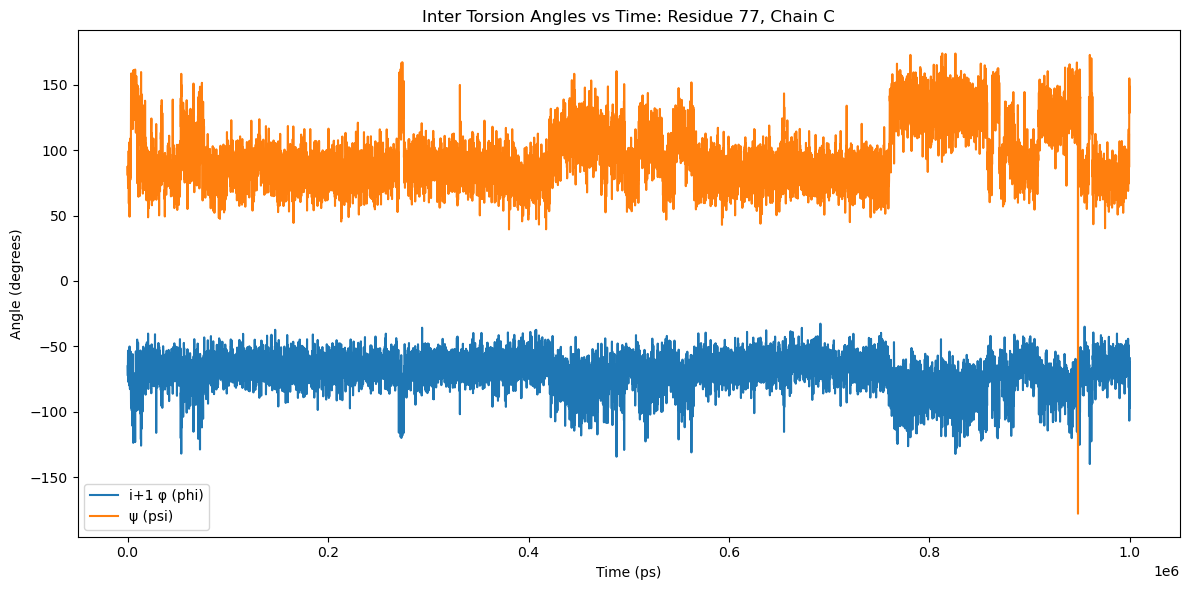

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_78_Chain_C.png


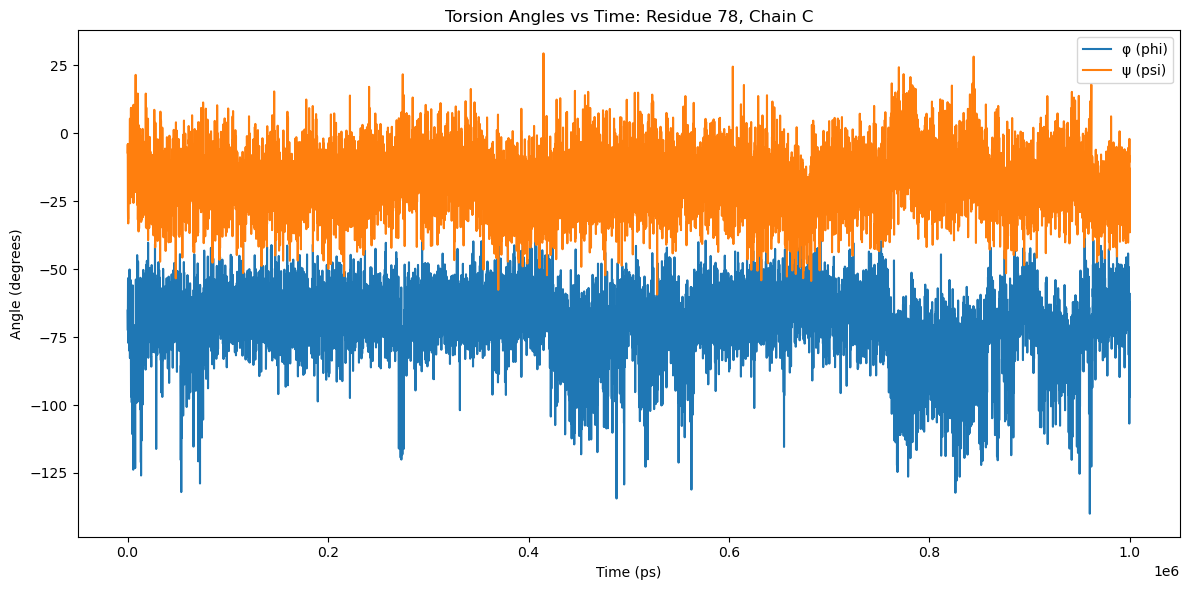

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_78_Chain_C.png


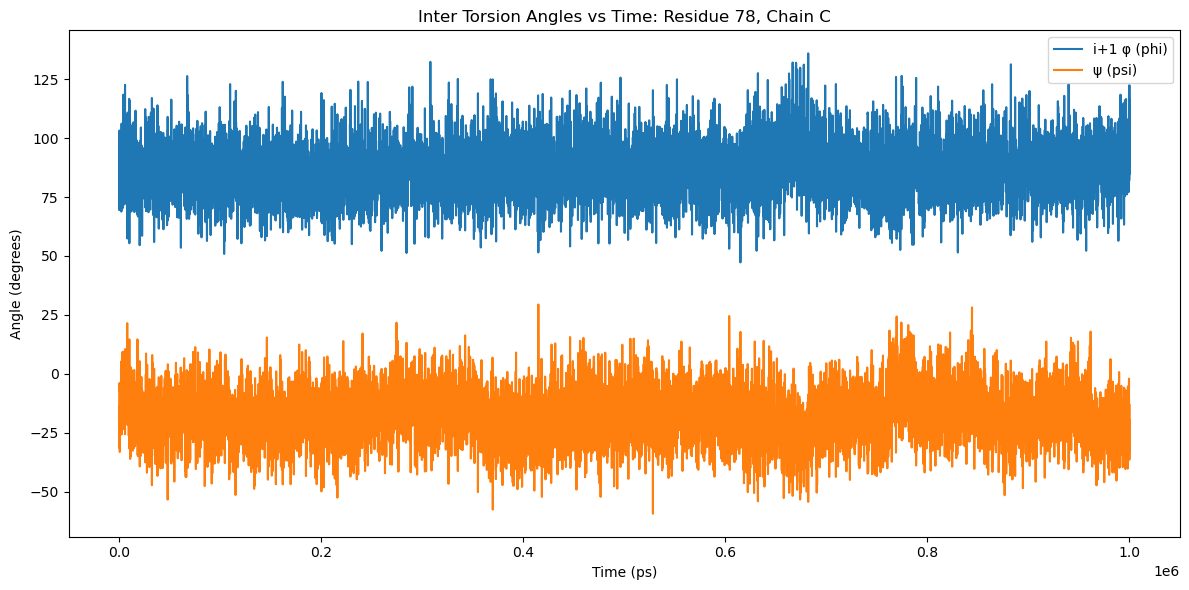

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_79_Chain_C.png


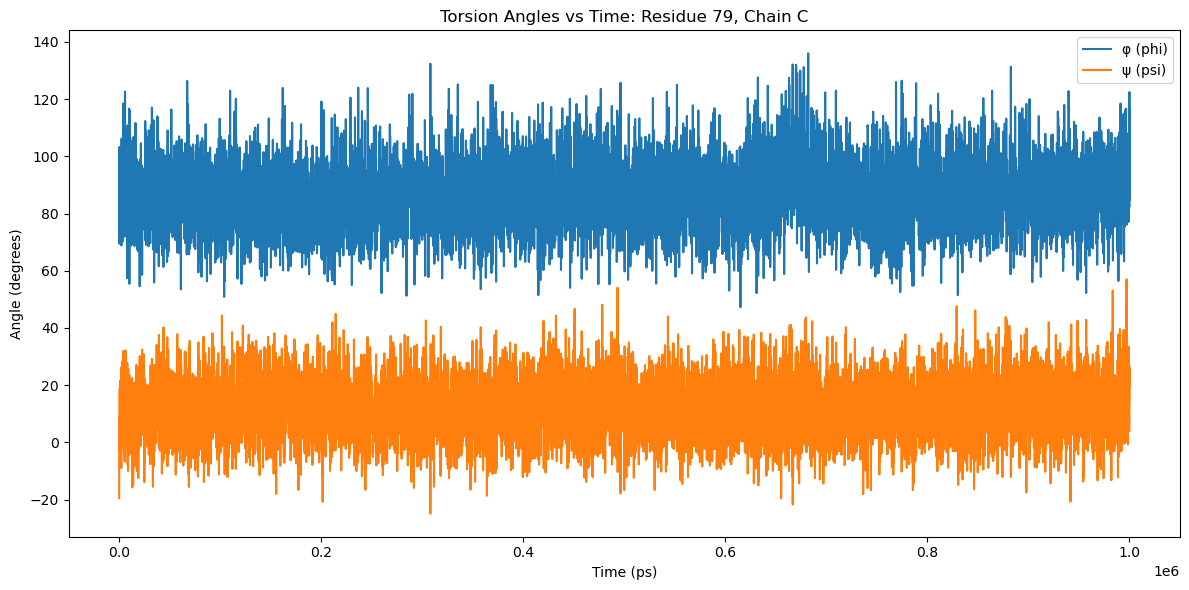

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_79_Chain_C.png


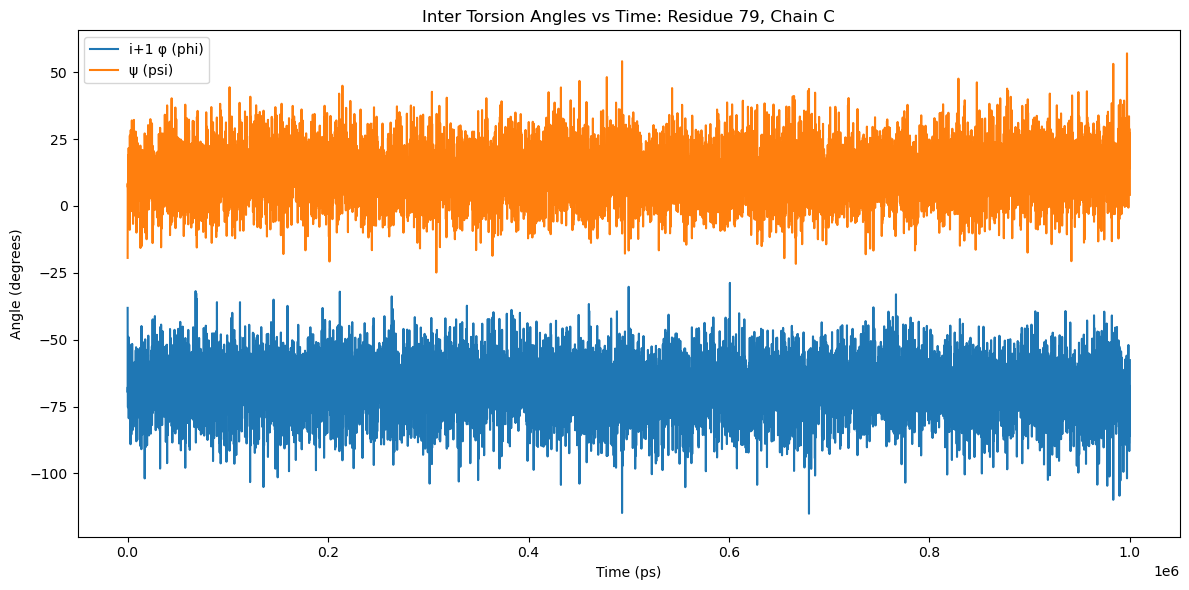

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_80_Chain_C.png


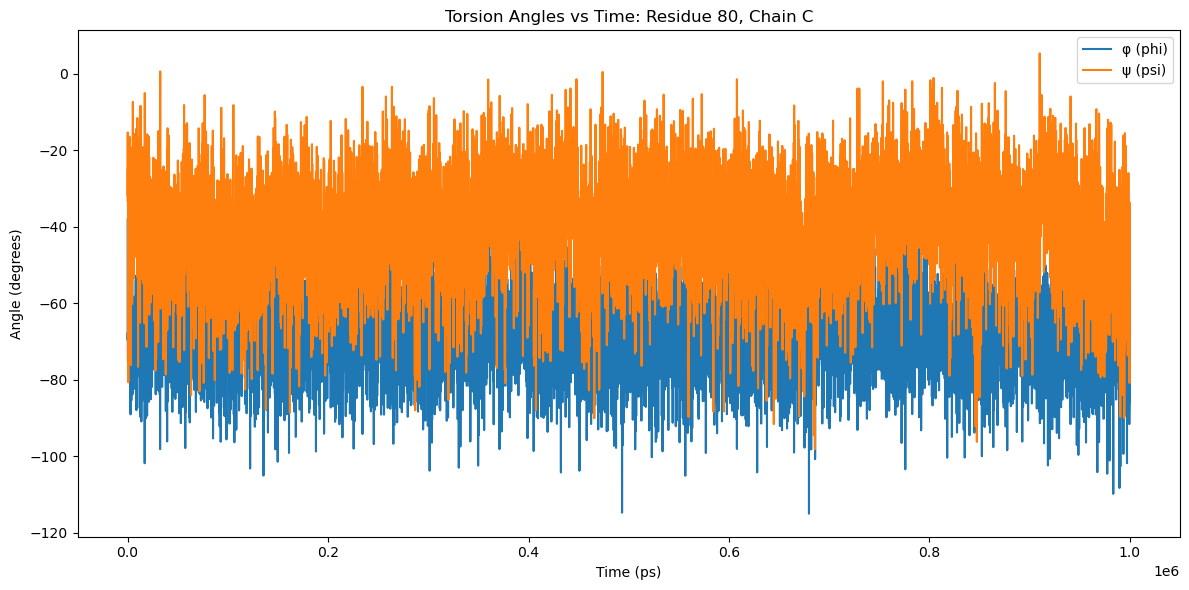

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_80_Chain_C.png


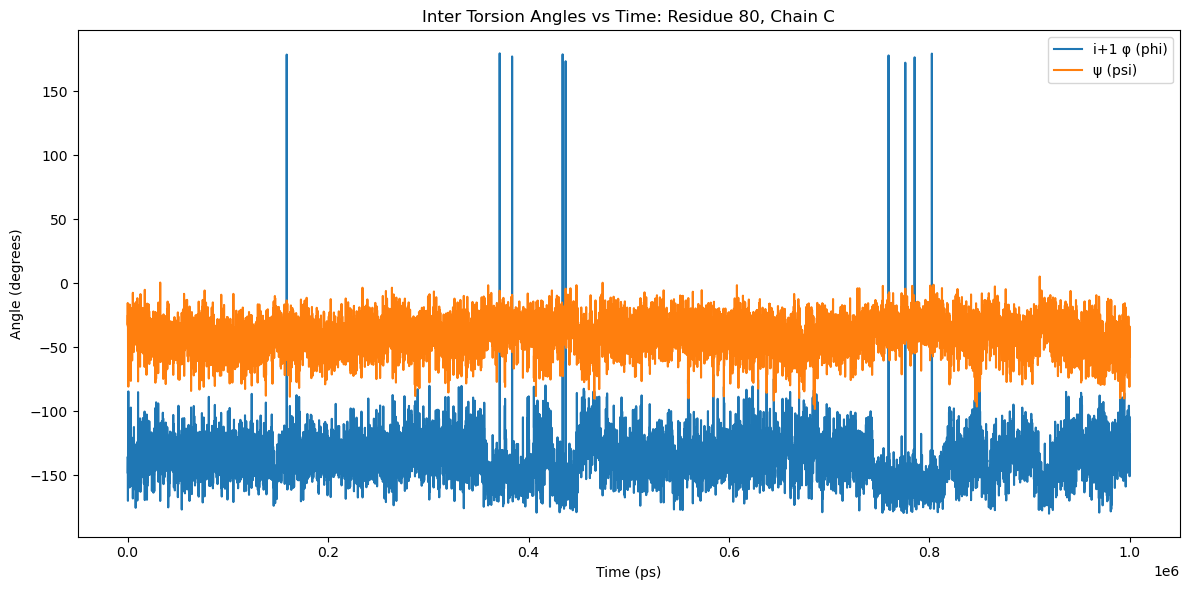

In [16]:
residues_to_plot=[52, 76,77, 78, 79, 80]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='C', analyzer=KcsA_analyzer[2], output_dir='KcsA_torsion_vs_time_ChainC')
    plot_inter_torsion_vs_time(residue=residue, chain='C', analyzer=KcsA_analyzer[2], output_dir='KcsA_inter_torsion_vs_time_ChainC')

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_52_Chain_D.png


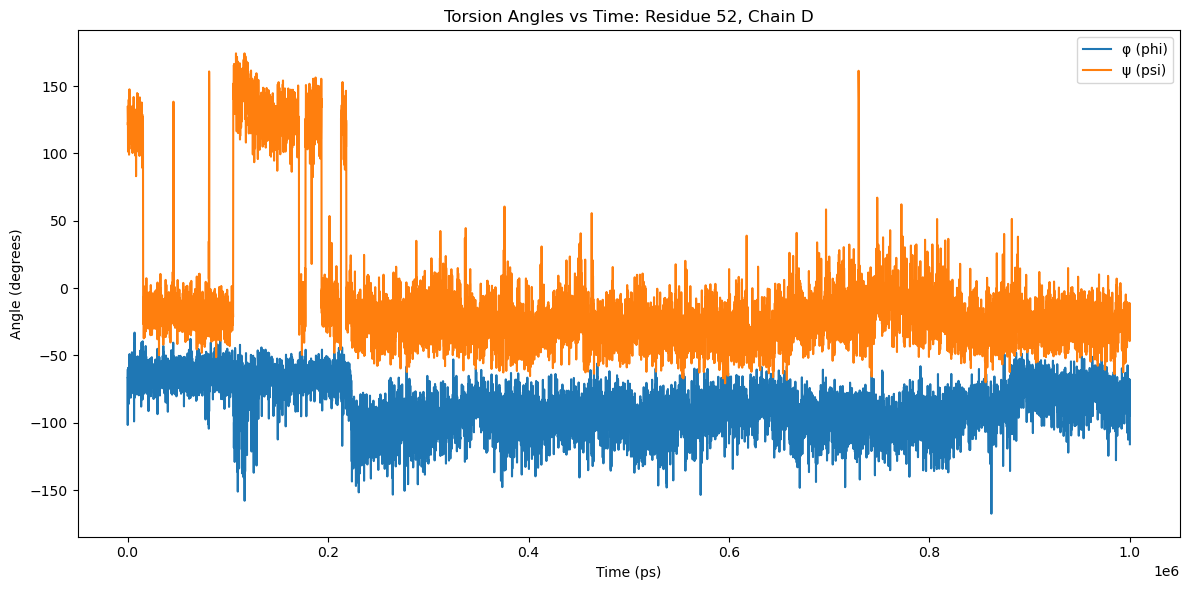

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_52_Chain_D.png


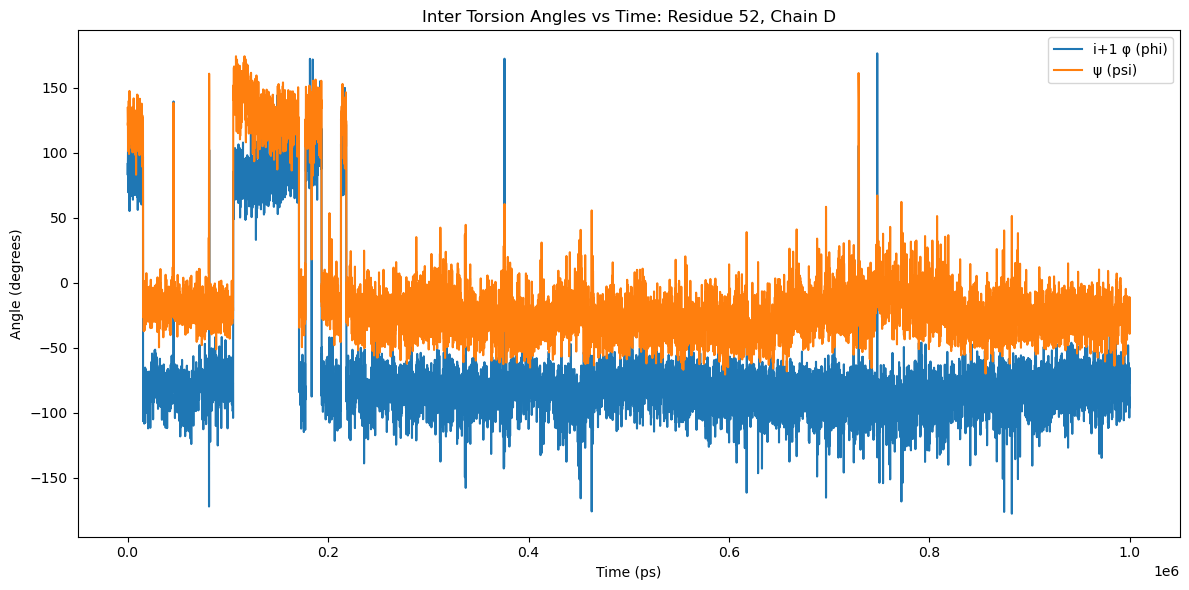

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_76_Chain_D.png


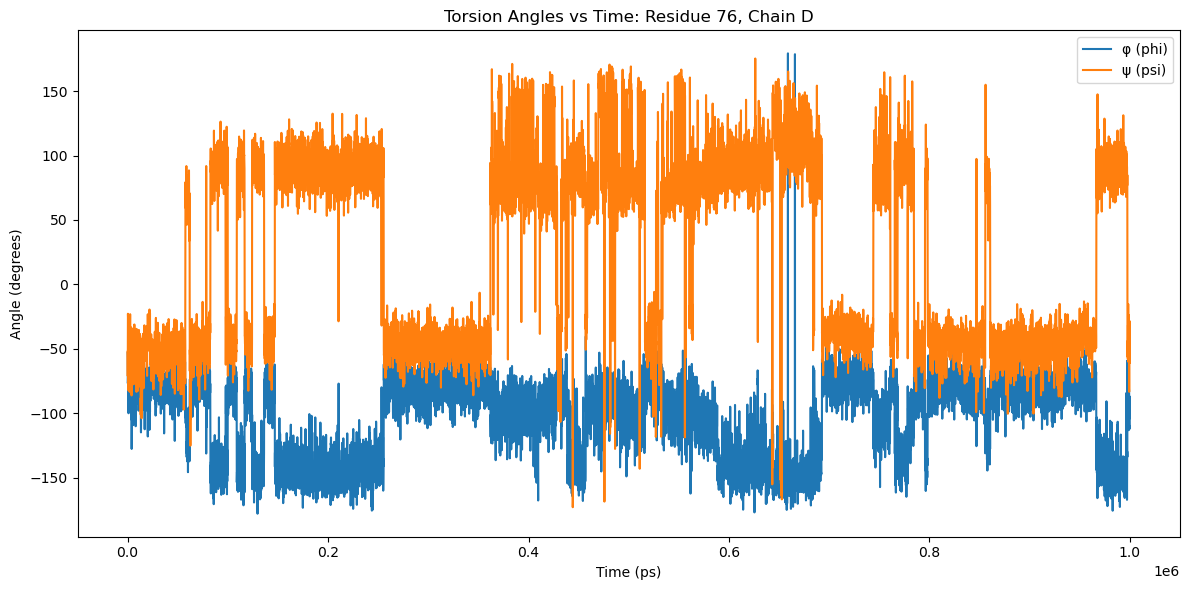

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_76_Chain_D.png


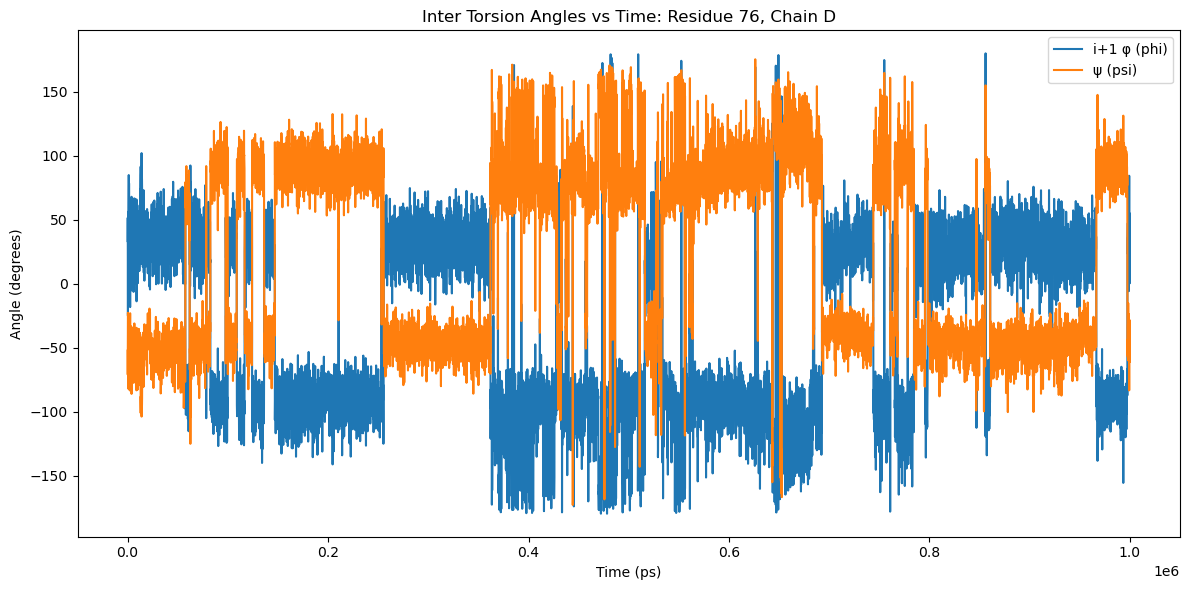

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_77_Chain_D.png


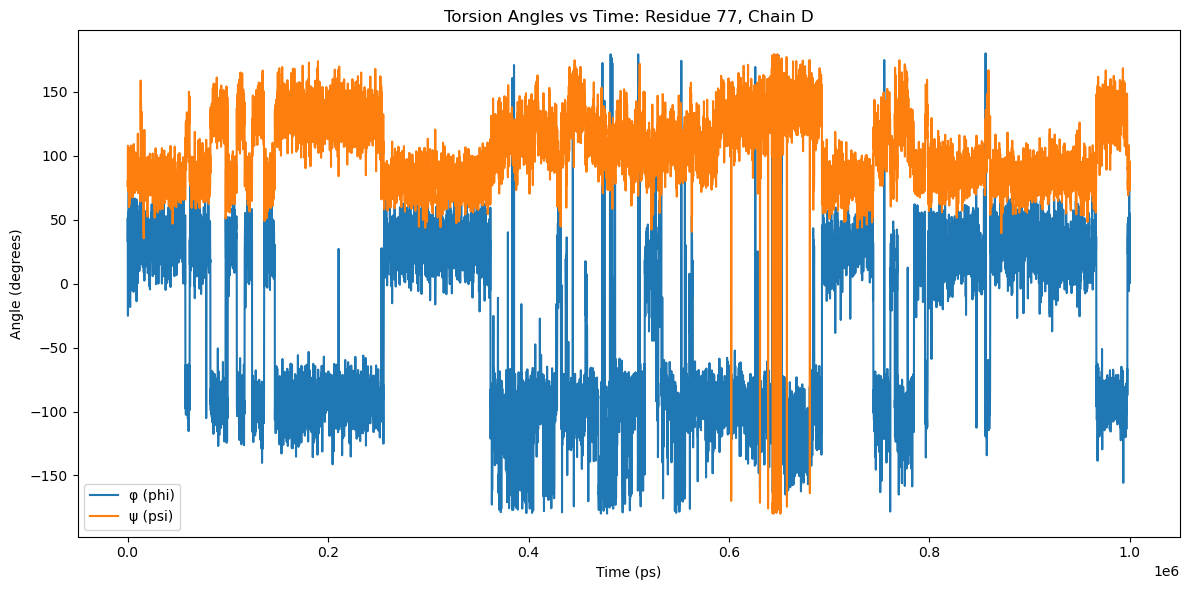

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_77_Chain_D.png


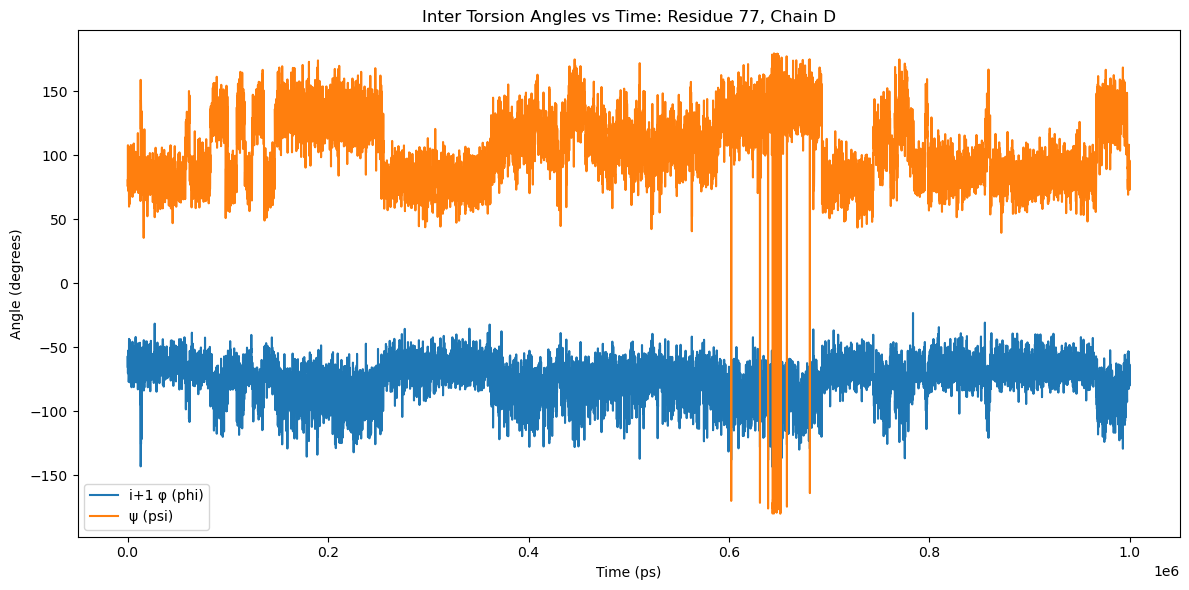

In [17]:
residues_to_plot=[52, 76, 77]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='D', analyzer=KcsA_analyzer[3], output_dir='KcsA_torsion_vs_time_ChainD')
    plot_inter_torsion_vs_time(residue=residue, chain='D', analyzer=KcsA_analyzer[3], output_dir='KcsA_inter_torsion_vs_time_ChainD')

## Correlation time analysis

Methods 1: use P2(COS thata)

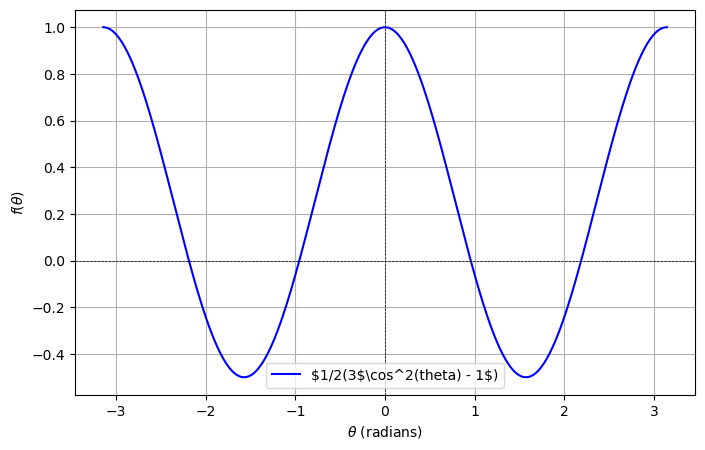

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of theta
theta = np.linspace(-np.pi, np.pi, 400)

# Compute the function values
f_theta = 1/2 * (3*np.cos(theta)**2 - 1)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(theta, f_theta, label=r'$1/2(3$\cos^2(theta) - 1$)', color='b')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$f(\theta)$')

plt.legend()
plt.grid(True)
plt.show()

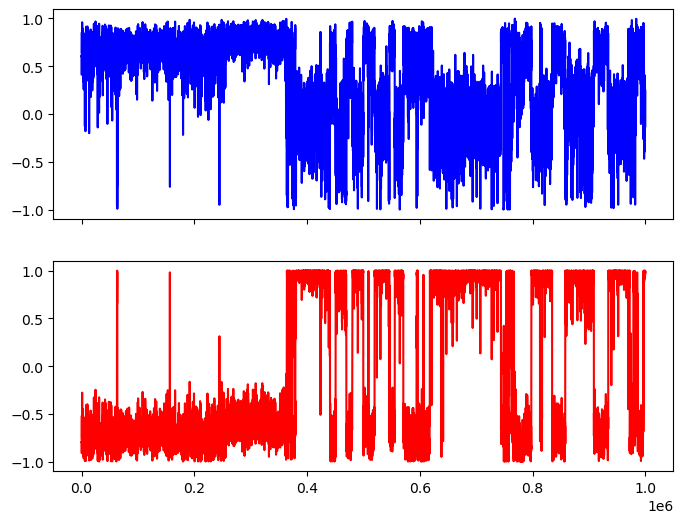

In [37]:
time = KcsA_analyzer[0].data['time_ps'].to_numpy()
chain = 'A'
residue = 76
psi = KcsA_analyzer[0].data[f'{chain}:{residue}-psi'].to_numpy()
psi_cos= np.cos(psi/180*np.pi)
psi_sin= np.sin(psi/180*np.pi)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(time, psi_cos, label=f'{chain}:{residue}-psi', color='blue')
ax2.plot(time, psi_sin, label=f'{chain}:{residue}-psi', color='red')


In [31]:
from hmmlearn import hmm
def fit_hmm(signal, n_states=2):
    """Fit a two-state HMM to the signal."""
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100)
    signal_reshaped = signal.reshape(-1, 1)
    model.fit(signal_reshaped)
    hidden_states = model.predict(signal_reshaped)
    return model, hidden_states

def plot_hmm(signal, hidden_states):
    """Plot signal with HMM-inferred state classifications."""
    plt.figure(figsize=(8, 4))
    plt.plot(signal, label="Signal", alpha=0.7)
    plt.scatter(np.arange(len(signal)), hidden_states, color='red', marker='o', s=10, label="HMM States")
    plt.xlabel("Time")
    plt.ylabel("Signal Intensity")
    plt.title("HMM-Inferred State Classification")
    plt.legend()
    plt.show()

In [ ]:
def calculate_cross_correlation(y1, y2, lags):
    """
    Calculate the cross-correlation of two time series for specified lags.
    
    Parameters:
    y1 (np.ndarray): The first time series.
    y2 (np.ndarray): The second time series.
    lags (np.ndarray): Array of lags for which to calculate cross-correlation.
    
    Returns:
    cross_corr (np.ndarray): Cross-correlation values for each lag.
    """
    n = len(y1)
    cross_corr = np.zeros_like(lags, dtype=float)

    # Mean of both time series
    y1_mean = np.mean(y1)
    y2_mean = np.mean(y2)

    # Calculate cross-correlation for specified lags
    for idx, lag in enumerate(lags):
        if lag < 0:
            cross_corr[idx] = np.sum((y1[-lag:] - y1_mean) * (y2[:lag] - y2_mean))
        else:
            cross_corr[idx] = np.sum((y1[:-lag] - y1_mean) * (y2[lag:] - y2_mean))

    # Normalize the result
    cross_corr /= n
    return cross_corr

def calculate_residue_values_and_correlations(file_name):
    try:
        # Load the CSV file into a pandas DataFrame
        data = pd.read_csv(file_name)
    except FileNotFoundError:
        print(f"Error: The file {file_name} was not found.")
        return
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Check if the time_ps column exists
    if 'time_ps' not in data.columns:
        print("Error: 'time_ps' column not found in the CSV file.")
        return

    # Initialize a dictionary to store calculated values
    residue_values = {}
    
    # Get all the unique residues from the column names
    residues = sorted(set(col.split('-')[0] for col in data.columns if '-psi' in col or '-phi' in col))

    # Calculate the value for each residue
    for residue in residues:
        psi_col = f"{residue}-psi"
        phi_col = f"{residue}-phi"
        
        try:
            if psi_col in data.columns and phi_col in data.columns:
                # Calculate the value (phi + 0.5 * psi)
                residue_values[residue] = data[phi_col] + 0.5 * data[psi_col]
            else:
                print(f"Warning: Missing psi or phi column for residue {residue}.")
        except Exception as e:
            print(f"Error calculating value for residue {residue}: {e}")

    # Convert the dictionary to a DataFrame for easier manipulation
    values_df = pd.DataFrame(residue_values)

    adjusted_residues = [adjust_residue_number(res) for res in residues]
    values_df.columns = adjusted_residues


    # Define logarithmic lags from 1 ns to 10 ns (in number of time steps)
    time_points = values_df.shape[0]
    max_lag_ns = 50  # Maximum lag in ns
    lags = np.logspace(0, np.log10(max_lag_ns), num=max_lag_ns, dtype=int)

    # Initialize a dictionary to store cross-correlations
    cross_correlation_results = {}

    # Perform cross-correlation analysis between residues
    for i in range(len(adjusted_residues)):
        for j in range(i + 1, len(adjusted_residues)):  # Only calculate for i < j
            res_i = adjusted_residues[i]
            res_j = adjusted_residues[j]
            
            try:
                # Call the cross-correlation calculation function
                cross_corr = calculate_cross_correlation(
                    values_df[res_i].values, values_df[res_j].values, lags)
                cross_correlation_results[(res_i, res_j)] = (lags, cross_corr)
            except Exception as e:
                print(f"Error calculating cross-correlation for residues {res_i} and {res_j}: {e}")


    # Plot cross-correlations only involving residue 76
    for (res_i, res_j), (lags, cross_corr) in cross_correlation_results.items():
        if res_j == 76 :
            plt.figure(figsize=(10, 6))
            plt.plot(lags, cross_corr, marker='o')
            plt.title(f"Cross-Correlation between {res_i} and {res_j}")
            plt.xlabel("Lag (ns)")
            plt.ylabel("Cross-Correlation")
            plt.grid()
            plt.axhline(0, color='black', lw=0.5, ls='--')
            
            # Save the plot in the same directory as the input file
            plot_output_file = os.path.join(os.path.dirname(file_name),
                                             f"{res_i}_{res_j}_cross_correlation.png")
            plt.savefig(plot_output_file)
            plt.close()
            print(f"Cross-correlation plot saved as {plot_output_file}")

GaussianHMM(n_components=2, n_iter=100)